## Epsilon Greedy

0
10000
20000
--- 42.917975187301636 seconds ---


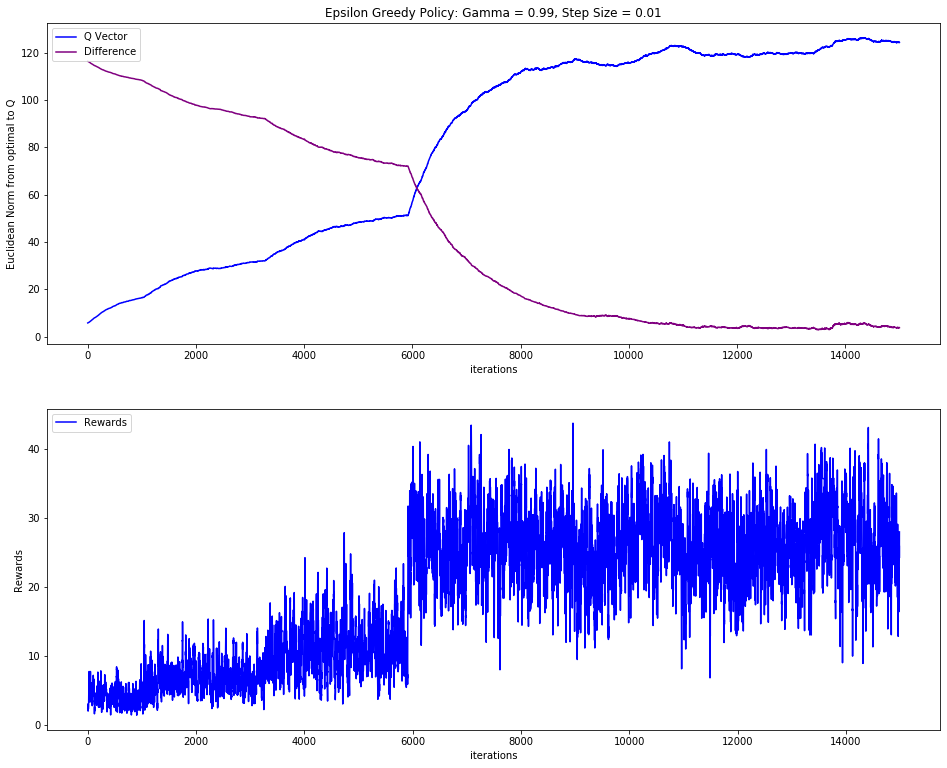

In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
import mdptoolbox.example
import numpy as np
import sys
import time
import time
import timeit
import warnings
warnings.filterwarnings('ignore')

class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.terminal              = 10
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        #print(self.rewards)
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.rewards                           = np.array([[0.997994,   0.98788917, 0.60332299, 0.12802087, 0.58319283, 0.00206464,  0.19891133, 0.95612316, 0.33044057, 0.63839011, 0], [0.94782189, 0.72855873, 0.32965116, 0.79176142, 0.10816552, 0.39231894, 0.22121813, 0.68372645, 0.10244628, 0.39702583, 0], [0.50634292, 0.34989768, 0.70641058, 0.02457702, 0.63398692, 0.23057129, 0.26870903, 0.8002556, 0.95556839, 0.31655021, 0]])
        self.transitions = np.array([[[0.11847748, 0.19305238, 0.01481604, 0.01817262, 0, 0.17366014, 0, 0.18145908, 0.20411116, 0, 0.09625109],  [0, 0, 0,  0,  0.46826678, 0.36019586,  0, 0, 0.17153736, 0, 0],  [0.07475531, 0, 0.01508056, 0.16279467, 0.13320348, 0.06239095, 0.12301144, 0, 0.13540043, 0.21847012, 0.07489302],  
                                      [0.13814029, 0.06730593, 0, 0.09866972, 0.14967253, 0.11755563, 0, 0.08509865, 0.16229298, 0.10931584, 0.07194841],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  [0.10880415, 0.15445165, 0.04159541, 0.10569029, 0.13451247, 0.11685767, 0.1501084,  0.08625954, 0.0330554,  0.03461996, 0.03404507],  
                                      [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0.1601253,  0.00675311, 0.16565002, 0.0205337,  0.04822082, 0.16615123, 0.16225705, 0.01011529, 0.0463817,  0.06362496, 0.15018681],  [0,0, 0, 1, 0, 0, 0, 0, 0,  0, 0],  [0,0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                     [[0, 0.11117147, 0.16656168, 0.16435951, 0.07849603, 0.12768003, 0.13023147, 0.05386311, 0.02101482, 0.07788199, 0.06873988],  [0.01079174, 0.07328504, 0.19653109, 0.19074128, 0, 0.08700166, 0.0739198,  0.1895154,  0.01665032, 0.16156368, 0],  [0, 0, 0.71010626, 0, 0, 0, 0.28989374, 0, 0, 0, 0],  
                                      [0.16263389, 0.02465111, 0.04295112, 0.03578322, 0.0962801,  0.16199941, 0.04532637, 0.16105695, 0.0042332,  0.14743767,0.11764696],  [0, 0, 0, 0.21932919, 0.14193876, 0.1975735, 0.06037827, 0, 0, 0, 0.38078027],  [0,  0, 0, 0, 0, 0.589443, 0, 0.410557, 0, 0, 0],  
                                      [0.05534813, 0, 0, 0.09460149, 0, 0.17626906, 0.19154841, 0, 0.28632051, 0.19591239, 0],  [0, 0.06855014, 0.16443767, 0.04956623, 0, 0, 0.08290543, 0, 0.52616951, 0.10837102, 0],  [0.59207374, 0, 0, 0.29608389, 0, 0, 0.03603537, 0.075807,  0, 0, 0],  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  
                                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                     [[0.115062, 0.30149332, 0.32352258, 0, 0.12897445, 0, 0, 0, 0, 0.07410246, 0.05684518],  [0, 0, 0, 0.01559824, 0, 0.15924881, 0, 0.31567349, 0, 0.37221513, 0.13726433],  [0, 0, 0, 0, 0, 0, 0.04173234, 0, 0.60469014, 0.35357751, 0],  [0.43253734, 0.06637228, 0.11537205, 0, 0, 0, 0, 0.23920235, 0.14651598, 0, 0],  
                                      [0.11651935, 0, 0.09736477, 0.05912902, 0.0166053,  0.24496303,  0.25685277, 0.03358916, 0.09352876, 0.04903922, 0.03240864],  [0.04183482, 0.19949461, 0.34397351, 0.12508018, 0.06331242, 0.13853659, 0, 0.05888664, 0, 0.02888122, 0],  [0, 0, 0.38278206, 0.31992955, 0.07684582, 0, 0.22044257, 0, 0,  0, 0],  
                                      [0.00632422, 0, 0, 0, 0, 0.32682937, 0, 0, 0.59930853, 0, 0.06753787],  [0.23875881, 0.17353509, 0.18098514, 0, 0, 0.09674519, 0, 0, 0, 0.0165584,  0.29341737],  [0, 0, 0, 0,0, 0, 0, 0, 0, 0, 1],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]])
        
        
#having a min epsilon of 0.1 makes sure that no matter what there is some exploration so that if the epsilon decays too fast the enviornment is not dependent on its previous knowledge
class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 30000, max_steps = 100,min_alpha=0.0, min_epsilon= 0.1, epsilon = 1.00, gamma = 0.99, decay = 25, solved=False):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        self.decay = decay  #works for most numbers between 5 and 35
        self.env = env #gym.make('CartPole-v0')
        self.QTable = np.ones((env.num_state, env.num_action))
        self.zeros = np.full((env.num_state, env.num_action), 0)
        self.QFunction = np.array([[22.64548446, 23.21740539, 23.11992163], [24.79556787, 24.64276343, 21.08847243], [22.42808202, 24.28306143, 24.28723371], [22.10055134, 21.79339319, 23.56944243], [ 0.58319283, 14.81946177, 23.67946435], [23.01378582, 24.71033772, 24.25958094], [23.62645803, 23.9339434,  23.97032516], [21.15633866, 24.35306117, 22.98125129], [23.66418858, 23.30295797, 17.8162478 ], [24.0659368, 23.73077384,  0.31655021], [ 0,          0,          0        ]])
        # Q Function is the optimal Q function as found through value iteration
    def action(self, state, epsilon):
        ''' choose an action using the epsilon policy '''
        if np.random.random() <= epsilon:
            action = random.choice(self.env.actions)
            action = list(self.env.actions).index(action)
        else:
            action = np.argmax(self.QTable[state])  # exploitation
        return action
    
    def action_policy(self, state, policy):
        return policy[state]

    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
#1-ln(time unit/decay)
    def learning(self):
        rewards = []
        alphaList = []
        epsilonList = []
        QList = []
        Q = []
        tt=0
        r = 0
        q = 0
        for e in range(self.max_episodes): 
            state = np.random.randint(0, self.env.num_state)
            if e % 10000 == 0:
                print(e)
            epsilon = self.decay_epsilon() #e)
            step_size = 0.01 #self.decay_step_size(e)
            r = 0
            for t in range(self.max_steps):
                if e % 2 == 0:
                    action = self.action(state, epsilon)
                if e % 2 == 1:
                    action = self.action_policy(state, policy)
                transitionVector = self.env.transitions[action][state]
                new_state = random.choices(population=self.env.states, weights=list(transitionVector))
                new_state = new_state[0]
                reward = self.env.rewards[action][state]
                #print(reward)
                self.Q_Update(state, action, reward, new_state, step_size)
                r+=reward
                state = new_state
                if state == 10:
                    break
            stateTuple = list()
            stateList = []
            actionsList = []
            states = []
            for list1 in self.QTable:
                actions = np.argmax(list1)
                actionsList.append(actions)
            observations = np.argwhere(self.QTable>=0)
            for obsList in observations:
                stateTuple = (obsList[0])
                stateList.append(stateTuple)
            del stateList[1::3]
            del stateList[1::2]
            policy = dict(zip(stateList, actionsList))
            if e % 2 == 1:
                rewards.append(r)
                QList.append(np.linalg.norm(self.QTable))# - self.QFunction))
                Q.append(np.linalg.norm(self.QTable - self.QFunction))
                alphaList.append(step_size)
                epsilonList.append(epsilon)
        return rewards, QList, Q
    
    def moving_average(self, rewards, window_size = 10): #A specified window size determines the size of each subset
        sum_vec = np.cumsum(np.insert(rewards, 0, 0))  
        moving_ave = (sum_vec[window_size:] - sum_vec[:-window_size]) / window_size  #formula for moving average
        return moving_ave    

if __name__ == '__main__':
    ''' Run main program. '''
    start_time = time.time()
    env = MarkovDP(11,3)
    env.initialize_mdp()
    solve = Qlearning(env)#MarkovDP)
    reward, QList, Q = solve.learning()
    #print(min(Q))
    ave = solve.moving_average(reward)
    #print(min(QList))
    print("--- %s seconds ---" % (time.time() - start_time))
    fig = plt.figure(figsize=(16,13))
    """ax1 = fig.add_subplot(311)
    ax1.plot(epsilon,  # epsilon_hist,
             color='b',
             label='Epsilon')
    ax1.set(title='Epsilon Plot',
            ylabel='Epsilon',
            xlabel='episodes')"""
    ax2 = fig.add_subplot(211)
    ax2.plot(QList,  
             color='b',
             label='Q Vector')
    ax2.plot(Q, 
             color='purple',
             label='Difference')
    ax2.set(title='Epsilon Greedy Policy: Gamma = 0.99, Step Size = 0.01', 
            ylabel='Euclidean Norm from optimal to Q',
            xlabel='iterations')
    ax3 = fig.add_subplot(212)
    ax3.plot(ave,  
             color='b',
             label='Rewards')
    ax3.set(title='',   #Epsilon Greedy: Gamma = 0.95, Step Size = 0.01', 
            ylabel='Rewards',
            xlabel='iterations')
    """ax3 = fig.add_subplot(313)
    ax3.plot(rewards,  # epsilon_hist,
             color='b',
             label='rewards')
    ax3.set(title='10x3 MDP',
            ylabel='Rewards',
            xlabel='episodes')"""
    fig.subplots_adjust(hspace=0.2)
    #ax1.legend(loc='best')
    ax2.legend(loc='best')
    ax3.legend(loc='best')

    plt.show()


# BP

0
10000
20000
30000
2.3408178472527337
--- 51.732779026031494 seconds ---


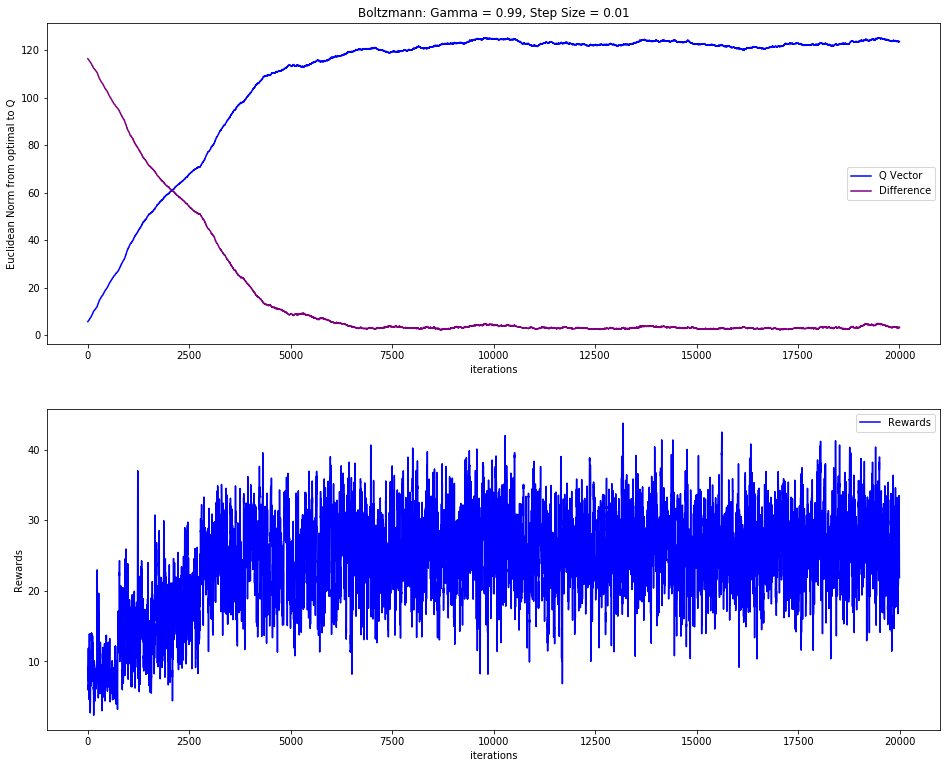

In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
import mdptoolbox.example
import numpy as np
import sys
import time
import time
import timeit
import warnings
warnings.filterwarnings('ignore')

class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.terminal              = 10
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        #print(self.rewards)
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.rewards     = np.array([[0.997994,   0.98788917, 0.60332299, 0.12802087, 0.58319283, 0.00206464,  0.19891133, 0.95612316, 0.33044057, 0.63839011, 0], [0.94782189, 0.72855873, 0.32965116, 0.79176142, 0.10816552, 0.39231894, 0.22121813, 0.68372645, 0.10244628, 0.39702583, 0], [0.50634292, 0.34989768, 0.70641058, 0.02457702, 0.63398692, 0.23057129, 0.26870903, 0.8002556, 0.95556839, 0.31655021, 0]])
        self.transitions = np.array([[[0.11847748, 0.19305238, 0.01481604, 0.01817262, 0, 0.17366014, 0, 0.18145908, 0.20411116, 0, 0.09625109],  [0, 0, 0,  0,  0.46826678, 0.36019586,  0, 0, 0.17153736, 0, 0],  [0.07475531, 0, 0.01508056, 0.16279467, 0.13320348, 0.06239095, 0.12301144, 0, 0.13540043, 0.21847012, 0.07489302],  
                                      [0.13814029, 0.06730593, 0, 0.09866972, 0.14967253, 0.11755563, 0, 0.08509865, 0.16229298, 0.10931584, 0.07194841],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  [0.10880415, 0.15445165, 0.04159541, 0.10569029, 0.13451247, 0.11685767, 0.1501084,  0.08625954, 0.0330554,  0.03461996, 0.03404507],  
                                      [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0.1601253,  0.00675311, 0.16565002, 0.0205337,  0.04822082, 0.16615123, 0.16225705, 0.01011529, 0.0463817,  0.06362496, 0.15018681],  [0,0, 0, 1, 0, 0, 0, 0, 0,  0, 0],  [0,0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                     [[0, 0.11117147, 0.16656168, 0.16435951, 0.07849603, 0.12768003, 0.13023147, 0.05386311, 0.02101482, 0.07788199, 0.06873988],  [0.01079174, 0.07328504, 0.19653109, 0.19074128, 0, 0.08700166, 0.0739198,  0.1895154,  0.01665032, 0.16156368, 0],  [0, 0, 0.71010626, 0, 0, 0, 0.28989374, 0, 0, 0, 0],  
                                      [0.16263389, 0.02465111, 0.04295112, 0.03578322, 0.0962801,  0.16199941, 0.04532637, 0.16105695, 0.0042332,  0.14743767,0.11764696],  [0, 0, 0, 0.21932919, 0.14193876, 0.1975735, 0.06037827, 0, 0, 0, 0.38078027],  [0,  0, 0, 0, 0, 0.589443, 0, 0.410557, 0, 0, 0],  
                                      [0.05534813, 0, 0, 0.09460149, 0, 0.17626906, 0.19154841, 0, 0.28632051, 0.19591239, 0],  [0, 0.06855014, 0.16443767, 0.04956623, 0, 0, 0.08290543, 0, 0.52616951, 0.10837102, 0],  [0.59207374, 0, 0, 0.29608389, 0, 0, 0.03603537, 0.075807,  0, 0, 0],  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  
                                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                     [[0.115062, 0.30149332, 0.32352258, 0, 0.12897445, 0, 0, 0, 0, 0.07410246, 0.05684518],  [0, 0, 0, 0.01559824, 0, 0.15924881, 0, 0.31567349, 0, 0.37221513, 0.13726433],  [0, 0, 0, 0, 0, 0, 0.04173234, 0, 0.60469014, 0.35357751, 0],  [0.43253734, 0.06637228, 0.11537205, 0, 0, 0, 0, 0.23920235, 0.14651598, 0, 0],  
                                      [0.11651935, 0, 0.09736477, 0.05912902, 0.0166053,  0.24496303,  0.25685277, 0.03358916, 0.09352876, 0.04903922, 0.03240864],  [0.04183482, 0.19949461, 0.34397351, 0.12508018, 0.06331242, 0.13853659, 0, 0.05888664, 0, 0.02888122, 0],  [0, 0, 0.38278206, 0.31992955, 0.07684582, 0, 0.22044257, 0, 0,  0, 0],  
                                      [0.00632422, 0, 0, 0, 0, 0.32682937, 0, 0, 0.59930853, 0, 0.06753787],  [0.23875881, 0.17353509, 0.18098514, 0, 0, 0.09674519, 0, 0, 0, 0.0165584,  0.29341737],  [0, 0, 0, 0,0, 0, 0, 0, 0, 0, 1],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]])
        
        
#having a min epsilon of 0.1 makes sure that no matter what there is some exploration so that if the epsilon decays too fast the enviornment is not dependent on its previous knowledge
class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 40000, max_steps = 100,min_alpha=0.0, min_epsilon= 0.1, epsilon = 1.00, gamma = 0.99, decay = 25, solved=False):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        self.decay = decay  #works for most numbers between 5 and 35
        self.env = env #gym.make('CartPole-v0')
        self.QTable = np.ones((env.num_state, env.num_action))
        self.zeros = np.full((env.num_state, env.num_action), 0)
        self.QFunction = np.array([[22.64548446, 23.21740539, 23.11992163], [24.79556787, 24.64276343, 21.08847243], [22.42808202, 24.28306143, 24.28723371], [22.10055134, 21.79339319, 23.56944243], [ 0.58319283, 14.81946177, 23.67946435], [23.01378582, 24.71033772, 24.25958094], [23.62645803, 23.9339434,  23.97032516], [21.15633866, 24.35306117, 22.98125129], [23.66418858, 23.30295797, 17.8162478 ], [24.0659368, 23.73077384,  0.31655021], [ 0,          0,          0        ]])
        self.tau = 100000    # tau --> 0 pure exploitation tau --> infinity pure exploration
        self.tau_decay = True
        self.decay_factor_tau = 1.5 
        
        
    def action(self, state, tau):
        qList = self.QTable[state] #moves = self.q_matrix[pos_index]
        self.actions = [i for i in range(0, self.env.num_action)]
        # Circumvent math issues with temperature actually being 0
        if self.tau > 0.0:
            action_probs_numes = []
            denom = 0
            for q in qList:
                val = math.exp(q / self.tau)
                action_probs_numes.append(val)
                denom += val  # summation of the values
            action_probs = []
            for x in action_probs_numes:
                probs = x / denom 
                action_probs.append(probs)    
            prob_sum = 0
            action = random.choices(self.actions, weights=action_probs, k=1)[0] # the weights give a weight to correspond 
            #for each action , and then chooses a random action with each action weighted by it prob. and then chooses
            #I attemped using the action for the max probabilty but it only returned one action each time
        else:
            # Here we're just exploiting
            action = np.argmax(self.QTable[state])
        return action
    
    def action_policy(self, state, policy):
        return policy[state]
    
    def decay_tau(self, t):          
        if self.tau_decay is True:
            new_tau = self.tau - self.decay_factor_tau
        if new_tau < 1.0:
            self.tau = 1.0
        else:
            self.tau = new_tau
        return new_tau 

    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
    def learning(self):
        rewards = []
        alphaList = []
        epsilonList = []
        QList = []
        Q = []
        tt=0
        r = 0
        q = 0
        for e in range(self.max_episodes): 
            state = np.random.randint(0, self.env.num_state)
            if e % 10000 == 0:
                print(e)
            epsilon = self.decay_tau(e)
            step_size = 0.01 #self.decay_step_size(e)
            r = 0
            for t in range(self.max_steps):
                if e % 2 == 0:
                    action = self.action(state, epsilon)
                if e % 2 == 1:
                    action = self.action_policy(state, policy)
                transitionVector = self.env.transitions[action][state]
                new_state = random.choices(population=self.env.states, weights=list(transitionVector))
                new_state = new_state[0]
                reward = self.env.rewards[action][state]
                #print(reward)
                self.Q_Update(state, action, reward, new_state, step_size)
                r+=reward
                state = new_state
                if state == 10:
                    break
            stateTuple = list()
            stateList = []
            actionsList = []
            states = []
            #print(self.QTable)
            for list1 in self.QTable:
                actions = np.argmax(list1)
                actionsList.append(actions)
            observations = np.argwhere(self.QTable>=0)
            for obsList in observations:
                stateTuple = (obsList[0])
                stateList.append(stateTuple)
            del stateList[1::3]
            del stateList[1::2]
            policy = dict(zip(stateList, actionsList))
            if e % 2 == 1:
                rewards.append(r)
                QList.append(np.linalg.norm(self.QTable))# - self.QFunction))
                Q.append(np.linalg.norm(self.QTable - self.QFunction))
                alphaList.append(step_size)
                epsilonList.append(epsilon)
        #print(self.QTable)
        return rewards, QList, Q
    
    def moving_average(self, rewards, window_size = 10): #A specified window size determines the size of each subset
        sum_vec = np.cumsum(np.insert(rewards, 0, 0))  
        moving_ave = (sum_vec[window_size:] - sum_vec[:-window_size]) / window_size  #formula for moving average
        return moving_ave    

if __name__ == '__main__':
    ''' Run main program. '''
    start_time = time.time()
    env = MarkovDP(11,3)
    env.initialize_mdp()
    solve = Qlearning(env)#MarkovDP)
    reward, QList, Q = solve.learning()
    print(min(Q))
    ave = solve.moving_average(reward)
    #print(min(QList))
    print("--- %s seconds ---" % (time.time() - start_time))
    fig = plt.figure(figsize=(16,13))
    """ax1 = fig.add_subplot(311)
    ax1.plot(epsilon,  # epsilon_hist,
             color='b',
             label='Epsilon')
    ax1.set(title='Epsilon Plot',
            ylabel='Epsilon',
            xlabel='episodes')"""
    ax2 = fig.add_subplot(211)
    ax2.plot(QList,  
             color='b',
             label='Q Vector')
    ax2.plot(Q, 
             color='purple',
             label='Difference')
    ax2.set(title='Boltzmann: Gamma = 0.99, Step Size = 0.01', 
            ylabel='Euclidean Norm from optimal to Q',
            xlabel='iterations')
    ax3 = fig.add_subplot(212)
    ax3.plot(ave,  
             color='b',
             label='Rewards')
    ax3.set(title='',   #Epsilon Greedy: Gamma = 0.95, Step Size = 0.01', 
            ylabel='Rewards',
            xlabel='iterations')
    """ax3 = fig.add_subplot(313)
    ax3.plot(rewards,  # epsilon_hist,
             color='b',
             label='rewards')
    ax3.set(title='10x3 MDP',
            ylabel='Rewards',
            xlabel='episodes')"""
    fig.subplots_adjust(hspace=0.2)
    #ax1.legend(loc='best')
    ax2.legend(loc='best')
    ax3.legend(loc='best')

    plt.show()


# UP

0
10000
--- 21.849486827850342 seconds ---


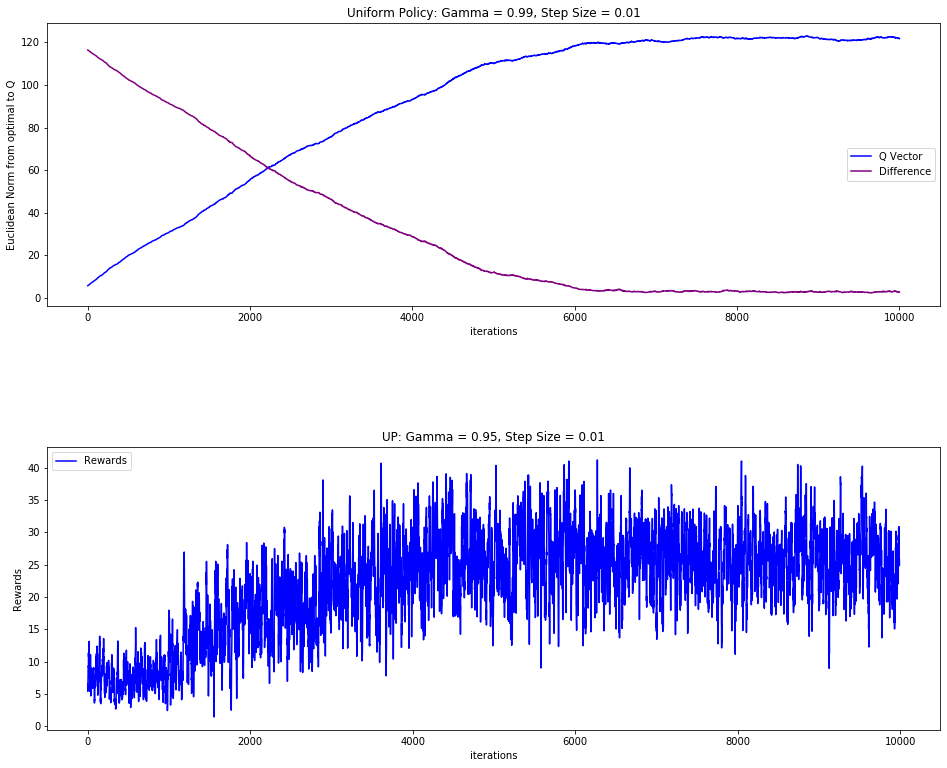

In [18]:
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
import mdptoolbox.example
import numpy as np
import sys
import time
import timeit
import warnings
warnings.filterwarnings('ignore')

class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.terminal              = 10
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        #print(self.rewards)
        
    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        #self.transitions, self.rewards         = mdptoolbox.example.rand(self.num_state,self.num_action)
        #print(self.transitions)
        self.rewards                           = np.array([[0.997994,   0.98788917, 0.60332299, 0.12802087, 0.58319283, 0.00206464,  0.19891133, 0.95612316, 0.33044057, 0.63839011, 0], [0.94782189, 0.72855873, 0.32965116, 0.79176142, 0.10816552, 0.39231894, 0.22121813, 0.68372645, 0.10244628, 0.39702583, 0], [0.50634292, 0.34989768, 0.70641058, 0.02457702, 0.63398692, 0.23057129, 0.26870903, 0.8002556, 0.95556839, 0.31655021, 0]])
        self.transitions = np.array([[[0.11847748, 0.19305238, 0.01481604, 0.01817262, 0, 0.17366014, 0, 0.18145908, 0.20411116, 0, 0.09625109],  [0, 0, 0,  0,  0.46826678, 0.36019586,  0, 0, 0.17153736, 0, 0],  [0.07475531, 0, 0.01508056, 0.16279467, 0.13320348, 0.06239095, 0.12301144, 0, 0.13540043, 0.21847012, 0.07489302],  
                                      [0.13814029, 0.06730593, 0, 0.09866972, 0.14967253, 0.11755563, 0, 0.08509865, 0.16229298, 0.10931584, 0.07194841],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  [0.10880415, 0.15445165, 0.04159541, 0.10569029, 0.13451247, 0.11685767, 0.1501084,  0.08625954, 0.0330554,  0.03461996, 0.03404507],  
                                      [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0.1601253,  0.00675311, 0.16565002, 0.0205337,  0.04822082, 0.16615123, 0.16225705, 0.01011529, 0.0463817,  0.06362496, 0.15018681],  [0,0, 0, 1, 0, 0, 0, 0, 0,  0, 0],  [0,0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                     [[0, 0.11117147, 0.16656168, 0.16435951, 0.07849603, 0.12768003, 0.13023147, 0.05386311, 0.02101482, 0.07788199, 0.06873988],  [0.01079174, 0.07328504, 0.19653109, 0.19074128, 0, 0.08700166, 0.0739198,  0.1895154,  0.01665032, 0.16156368, 0],  [0, 0, 0.71010626, 0, 0, 0, 0.28989374, 0, 0, 0, 0],  
                                      [0.16263389, 0.02465111, 0.04295112, 0.03578322, 0.0962801,  0.16199941, 0.04532637, 0.16105695, 0.0042332,  0.14743767,0.11764696],  [0, 0, 0, 0.21932919, 0.14193876, 0.1975735, 0.06037827, 0, 0, 0, 0.38078027],  [0,  0, 0, 0, 0, 0.589443, 0, 0.410557, 0, 0, 0],  
                                      [0.05534813, 0, 0, 0.09460149, 0, 0.17626906, 0.19154841, 0, 0.28632051, 0.19591239, 0],  [0, 0.06855014, 0.16443767, 0.04956623, 0, 0, 0.08290543, 0, 0.52616951, 0.10837102, 0],  [0.59207374, 0, 0, 0.29608389, 0, 0, 0.03603537, 0.075807,  0, 0, 0],  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  
                                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                     [[0.115062, 0.30149332, 0.32352258, 0, 0.12897445, 0, 0, 0, 0, 0.07410246, 0.05684518],  [0, 0, 0, 0.01559824, 0, 0.15924881, 0, 0.31567349, 0, 0.37221513, 0.13726433],  [0, 0, 0, 0, 0, 0, 0.04173234, 0, 0.60469014, 0.35357751, 0],  [0.43253734, 0.06637228, 0.11537205, 0, 0, 0, 0, 0.23920235, 0.14651598, 0, 0],  
                                      [0.11651935, 0, 0.09736477, 0.05912902, 0.0166053,  0.24496303,  0.25685277, 0.03358916, 0.09352876, 0.04903922, 0.03240864],  [0.04183482, 0.19949461, 0.34397351, 0.12508018, 0.06331242, 0.13853659, 0, 0.05888664, 0, 0.02888122, 0],  [0, 0, 0.38278206, 0.31992955, 0.07684582, 0, 0.22044257, 0, 0,  0, 0],  
                                      [0.00632422, 0, 0, 0, 0, 0.32682937, 0, 0, 0.59930853, 0, 0.06753787],  [0.23875881, 0.17353509, 0.18098514, 0, 0, 0.09674519, 0, 0, 0, 0.0165584,  0.29341737],  [0, 0, 0, 0,0, 0, 0, 0, 0, 0, 1],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]])
        
class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 20000, max_steps = 100,min_alpha=0.0, min_epsilon= 0.1, epsilon = 1.00, gamma = 0.99, decay = 25, solved=False):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        self.decay = decay  #works for most numbers between 5 and 35
        self.env = env #gym.make('CartPole-v0')
        self.QTable = np.ones((env.num_state, env.num_action))
        self.zeros = np.full((env.num_state, env.num_action), 0)
        self.QFunction = np.array([[22.64548446, 23.21740539, 23.11992163], [24.79556787, 24.64276343, 21.08847243], [22.42808202, 24.28306143, 24.28723371], [22.10055134, 21.79339319, 23.56944243], [ 0.58319283, 14.81946177, 23.67946435], [23.01378582, 24.71033772, 24.25958094], [23.62645803, 23.9339434,  23.97032516], [21.15633866, 24.35306117, 22.98125129], [23.66418858, 23.30295797, 17.8162478 ], [24.0659368, 23.73077384,  0.31655021], [ 0,          0,          0        ]])
        
    def action(self, state, epsilon):
        ''' choose an action using the epsilon policy '''
        action = random.choice(self.env.actions)
        action = list(self.env.actions).index(action)
        return action
    
    def action_policy(self, state, policy):
        return policy[state]

    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
    def learning(self):
        rewards = []
        alphaList = []
        epsilonList = []
        QList = []
        Q = []
        tt=0
        r = 0
        q = 0
        for e in range(self.max_episodes): 
            state = np.random.randint(0, self.env.num_state)
            if e % 10000 == 0:
                print(e)
            epsilon = self.decay_epsilon() #e)
            step_size = 0.01 #self.decay_step_size(e)
            r = 0
            for t in range(self.max_steps):
                if e % 2 == 0:
                    action = self.action(state, epsilon)
                if e % 2 == 1:
                    action = self.action_policy(state, policy)
                transitionVector = self.env.transitions[action][state]
                new_state = random.choices(population=self.env.states, weights=list(transitionVector))
                new_state = new_state[0]
                reward = self.env.rewards[action][state]
                self.Q_Update(state, action, reward, new_state, step_size)
                r+=reward
                state = new_state
                if state == 10:
                    break
            stateTuple = list()
            stateList = []
            actionsList = []
            states = []
            for list1 in self.QTable:
                actions = np.argmax(list1)
                actionsList.append(actions)
            observations = np.argwhere(self.QTable>=0)
            for obsList in observations:
                stateTuple = (obsList[0])
                stateList.append(stateTuple)
            del stateList[1::3]
            del stateList[1::2]
            policy = dict(zip(stateList, actionsList))
            if e % 2 == 1:
                rewards.append(r)
                QList.append(np.linalg.norm(self.QTable))# - self.QFunction))
                Q.append(np.linalg.norm(self.QTable - self.QFunction))
                alphaList.append(step_size)
                epsilonList.append(epsilon)
        return rewards, QList, Q
    
    def moving_average(self, rewards, window_size = 10): #A specified window size determines the size of each subset
        sum_vec = np.cumsum(np.insert(rewards, 0, 0))  
        moving_ave = (sum_vec[window_size:] - sum_vec[:-window_size]) / window_size  #formula for moving average
        return moving_ave    

if __name__ == '__main__':
    ''' Run main program. '''
    start_time = time.time()
    env = MarkovDP(11,3)
    env.initialize_mdp()
    solve = Qlearning(env)#MarkovDP)
    reward, QList, Q = solve.learning()
    #print(min(Q))
    ave = solve.moving_average(reward)
    #print(min(QList))
    print("--- %s seconds ---" % (time.time() - start_time))
    fig = plt.figure(figsize=(16,13))
    """ax1 = fig.add_subplot(311)
    ax1.plot(epsilon,  # epsilon_hist,
             color='b',
             label='Epsilon')
    ax1.set(title='Epsilon Plot',
            ylabel='Epsilon',
            xlabel='episodes')"""
    ax2 = fig.add_subplot(211)
    ax2.plot(QList,  
             color='b',
             label='Q Vector')
    ax2.plot(Q, 
             color='purple',
             label='Difference')
    ax2.set(title='Uniform Policy: Gamma = 0.99, Step Size = 0.01', 
            ylabel='Euclidean Norm from optimal to Q',
            xlabel='iterations')
    ax3 = fig.add_subplot(212)
    ax3.plot(ave,  
             color='b',
             label='Rewards')
    ax3.set(title='UP: Gamma = 0.95, Step Size = 0.01', 
            ylabel='Rewards',
            xlabel='iterations')
    """ax3 = fig.add_subplot(313)
    ax3.plot(rewards,  # epsilon_hist,
             color='b',
             label='rewards')
    ax3.set(title='10x3 MDP',
            ylabel='Rewards',
            xlabel='episodes')"""
    fig.subplots_adjust(hspace=0.5)
    #ax1.legend(loc='best')
    ax2.legend(loc='best')
    ax3.legend(loc='best')

    plt.show()


# Restarting Diminishing Step Size

0
10000
--- 52.43056273460388 seconds ---


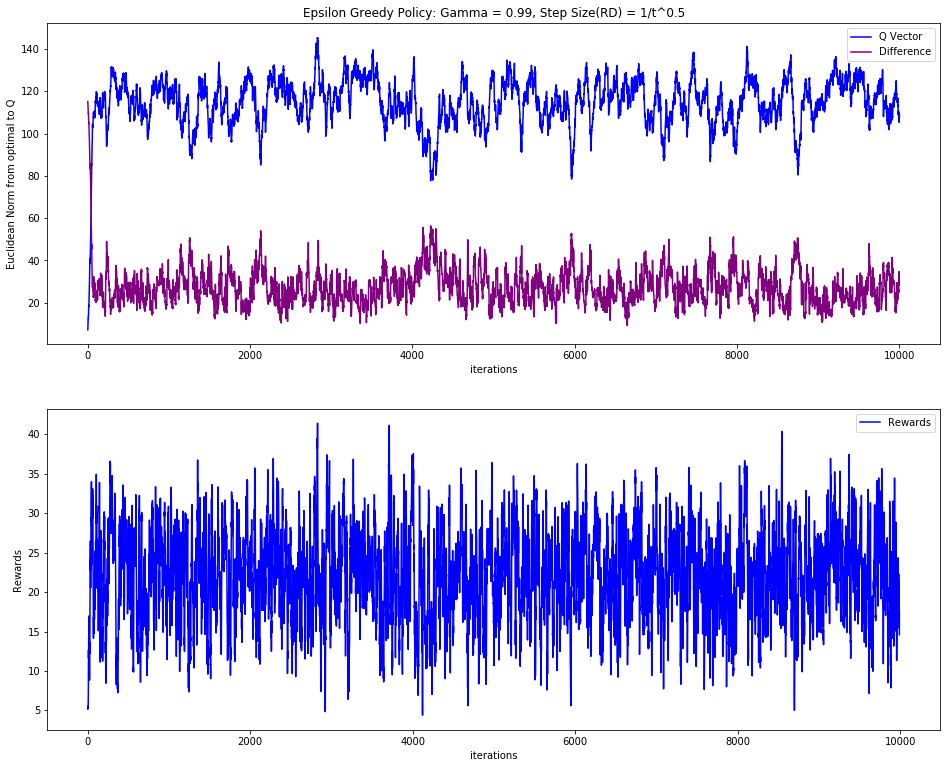

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
#env= MarkovDP(10,3)      #Define an MDP Environment : Insantiate Class
#env.initialize_mdp()    #Define P and R
import mdptoolbox.example
import numpy as np
import sys
import time
import time
import timeit
import warnings
warnings.filterwarnings('ignore')





class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.terminal              = 10
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        #print(self.rewards)
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.rewards                           = np.array([[0.997994,   0.98788917, 0.60332299, 0.12802087, 0.58319283, 0.00206464,  0.19891133, 0.95612316, 0.33044057, 0.63839011, 0], [0.94782189, 0.72855873, 0.32965116, 0.79176142, 0.10816552, 0.39231894, 0.22121813, 0.68372645, 0.10244628, 0.39702583, 0], [0.50634292, 0.34989768, 0.70641058, 0.02457702, 0.63398692, 0.23057129, 0.26870903, 0.8002556, 0.95556839, 0.31655021, 0]])
        self.transitions = np.array([[[0.11847748, 0.19305238, 0.01481604, 0.01817262, 0, 0.17366014, 0, 0.18145908, 0.20411116, 0, 0.09625109],  [0, 0, 0,  0,  0.46826678, 0.36019586,  0, 0, 0.17153736, 0, 0],  [0.07475531, 0, 0.01508056, 0.16279467, 0.13320348, 0.06239095, 0.12301144, 0, 0.13540043, 0.21847012, 0.07489302],  
                                      [0.13814029, 0.06730593, 0, 0.09866972, 0.14967253, 0.11755563, 0, 0.08509865, 0.16229298, 0.10931584, 0.07194841],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  [0.10880415, 0.15445165, 0.04159541, 0.10569029, 0.13451247, 0.11685767, 0.1501084,  0.08625954, 0.0330554,  0.03461996, 0.03404507],  
                                      [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0.1601253,  0.00675311, 0.16565002, 0.0205337,  0.04822082, 0.16615123, 0.16225705, 0.01011529, 0.0463817,  0.06362496, 0.15018681],  [0,0, 0, 1, 0, 0, 0, 0, 0,  0, 0],  [0,0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                     [[0, 0.11117147, 0.16656168, 0.16435951, 0.07849603, 0.12768003, 0.13023147, 0.05386311, 0.02101482, 0.07788199, 0.06873988],  [0.01079174, 0.07328504, 0.19653109, 0.19074128, 0, 0.08700166, 0.0739198,  0.1895154,  0.01665032, 0.16156368, 0],  [0, 0, 0.71010626, 0, 0, 0, 0.28989374, 0, 0, 0, 0],  
                                      [0.16263389, 0.02465111, 0.04295112, 0.03578322, 0.0962801,  0.16199941, 0.04532637, 0.16105695, 0.0042332,  0.14743767,0.11764696],  [0, 0, 0, 0.21932919, 0.14193876, 0.1975735, 0.06037827, 0, 0, 0, 0.38078027],  [0,  0, 0, 0, 0, 0.589443, 0, 0.410557, 0, 0, 0],  
                                      [0.05534813, 0, 0, 0.09460149, 0, 0.17626906, 0.19154841, 0, 0.28632051, 0.19591239, 0],  [0, 0.06855014, 0.16443767, 0.04956623, 0, 0, 0.08290543, 0, 0.52616951, 0.10837102, 0],  [0.59207374, 0, 0, 0.29608389, 0, 0, 0.03603537, 0.075807,  0, 0, 0],  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  
                                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                     [[0.115062, 0.30149332, 0.32352258, 0, 0.12897445, 0, 0, 0, 0, 0.07410246, 0.05684518],  [0, 0, 0, 0.01559824, 0, 0.15924881, 0, 0.31567349, 0, 0.37221513, 0.13726433],  [0, 0, 0, 0, 0, 0, 0.04173234, 0, 0.60469014, 0.35357751, 0],  [0.43253734, 0.06637228, 0.11537205, 0, 0, 0, 0, 0.23920235, 0.14651598, 0, 0],  
                                      [0.11651935, 0, 0.09736477, 0.05912902, 0.0166053,  0.24496303,  0.25685277, 0.03358916, 0.09352876, 0.04903922, 0.03240864],  [0.04183482, 0.19949461, 0.34397351, 0.12508018, 0.06331242, 0.13853659, 0, 0.05888664, 0, 0.02888122, 0],  [0, 0, 0.38278206, 0.31992955, 0.07684582, 0, 0.22044257, 0, 0,  0, 0],  
                                      [0.00632422, 0, 0, 0, 0, 0.32682937, 0, 0, 0.59930853, 0, 0.06753787],  [0.23875881, 0.17353509, 0.18098514, 0, 0, 0.09674519, 0, 0, 0, 0.0165584,  0.29341737],  [0, 0, 0, 0,0, 0, 0, 0, 0, 0, 1],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]])
        
        
#having a min epsilon of 0.1 makes sure that no matter what there is some exploration so that if the epsilon decays too fast the enviornment is not dependent on its previous knowledge
class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 20000, max_steps = 100,min_alpha=0.0, min_epsilon= 0.1, epsilon = 1.00, gamma = 0.99, decay = 25, solved=False):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        self.decay = decay  #works for most numbers between 5 and 35
        self.env = env #gym.make('CartPole-v0')
        self.QTable = np.ones((env.num_state, env.num_action))
        self.zeros = np.full((env.num_state, env.num_action), 0)
        self.QFunction = np.array([[22.64548446, 23.21740539, 23.11992163], [24.79556787, 24.64276343, 21.08847243], [22.42808202, 24.28306143, 24.28723371], [22.10055134, 21.79339319, 23.56944243], [ 0.58319283, 14.81946177, 23.67946435], [23.01378582, 24.71033772, 24.25958094], [23.62645803, 23.9339434,  23.97032516], [21.15633866, 24.35306117, 22.98125129], [23.66418858, 23.30295797, 17.8162478 ], [24.0659368, 23.73077384,  0.31655021], [ 0,          0,          0        ]])
        
    def action(self, state, epsilon):
        ''' choose an action using the epsilon policy '''
        if np.random.random() <= epsilon:
            action = random.choice(self.env.actions)
            action = list(self.env.actions).index(action)
        else:
            action = np.argmax(self.QTable[state])  # exploitation
        return action
    
    def action_policy(self, state, policy):
        return policy[state]

    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
#1-ln(time unit/decay)
    def learning(self):
        rewards = []
        alphaList = []
        epsilonList = []
        QList = []
        Q = []
        tt=0
        r = 0
        q = 0
        for e in range(self.max_episodes): 
            state = np.random.randint(0, self.env.num_state)
            if e % 10000 == 0:
                print(e)
            epsilon = self.decay_epsilon() #e)
            step_size = 1 #self.decay_step_size(e)
            r = 0
            for t in range(self.max_steps):
                step_size = self.decay_step_size(t)
                if e % 2 == 0:
                    action = self.action(state, epsilon)
                if e % 2 == 1:
                    action = self.action_policy(state, policy)
                transitionVector = self.env.transitions[action][state]
                new_state = random.choices(population=self.env.states, weights=list(transitionVector))
                new_state = new_state[0]
                reward = self.env.rewards[action][state]
                self.Q_Update(state, action, reward, new_state, step_size)
                r+=reward
                state = new_state
                if state == 10:
                    break
            stateTuple = list()
            stateList = []
            actionsList = []
            states = []
            for list1 in self.QTable:
                actions = np.argmax(list1)
                actionsList.append(actions)
            observations = np.argwhere(self.QTable>=0)
            for obsList in observations:
                stateTuple = (obsList[0])
                stateList.append(stateTuple)
            #print(stateList)
            del stateList[1::3]
            del stateList[1::2]
            policy = dict(zip(stateList, actionsList))
            if e % 2 == 1:
                rewards.append(r)
                QList.append(np.linalg.norm(self.QTable))# - self.QFunction))
                Q.append(np.linalg.norm(self.QTable - self.QFunction))
                alphaList.append(step_size)
                epsilonList.append(epsilon)
        return rewards, QList, Q
    
    def moving_average(self, rewards, window_size = 10): #A specified window size determines the size of each subset
        sum_vec = np.cumsum(np.insert(rewards, 0, 0))  
        moving_ave = (sum_vec[window_size:] - sum_vec[:-window_size]) / window_size  #formula for moving average
        return moving_ave    

if __name__ == '__main__':
    ''' Run main program. '''
    start_time = time.time()
    env = MarkovDP(11,3)
    env.initialize_mdp()
    solve = Qlearning(env)#MarkovDP)
    reward, QList, Q = solve.learning()
    #print(min(Q))
    ave = solve.moving_average(reward)
    #print(min(QList))
    print("--- %s seconds ---" % (time.time() - start_time))
    fig = plt.figure(figsize=(16,13))
    """ax1 = fig.add_subplot(311)
    ax1.plot(epsilon,  # epsilon_hist,
             color='b',
             label='Epsilon')
    ax1.set(title='Epsilon Plot',
            ylabel='Epsilon',
            xlabel='episodes')"""
    ax2 = fig.add_subplot(211)
    ax2.plot(QList,  
             color='b',
             label='Q Vector')
    ax2.plot(Q, 
             color='purple',
             label='Difference')
    ax2.set(title='Epsilon Greedy Policy: Gamma = 0.99, Step Size(RD) = 1/t^0.5', 
            ylabel='Euclidean Norm from optimal to Q',
            xlabel='iterations')
    ax3 = fig.add_subplot(212)
    ax3.plot(ave,  
             color='b',
             label='Rewards')
    ax3.set(title='',   #Epsilon Greedy: Gamma = 0.95, Step Size = 0.01', 
            ylabel='Rewards',
            xlabel='iterations')
    """ax3 = fig.add_subplot(313)
    ax3.plot(rewards,  # epsilon_hist,
             color='b',
             label='rewards')
    ax3.set(title='10x3 MDP',
            ylabel='Rewards',
            xlabel='episodes')"""
    fig.subplots_adjust(hspace=0.2)
    #ax1.legend(loc='best')
    ax2.legend(loc='best')
    ax3.legend(loc='best')

    plt.show()


# BP

0
10000
--- 22.26668691635132 seconds ---


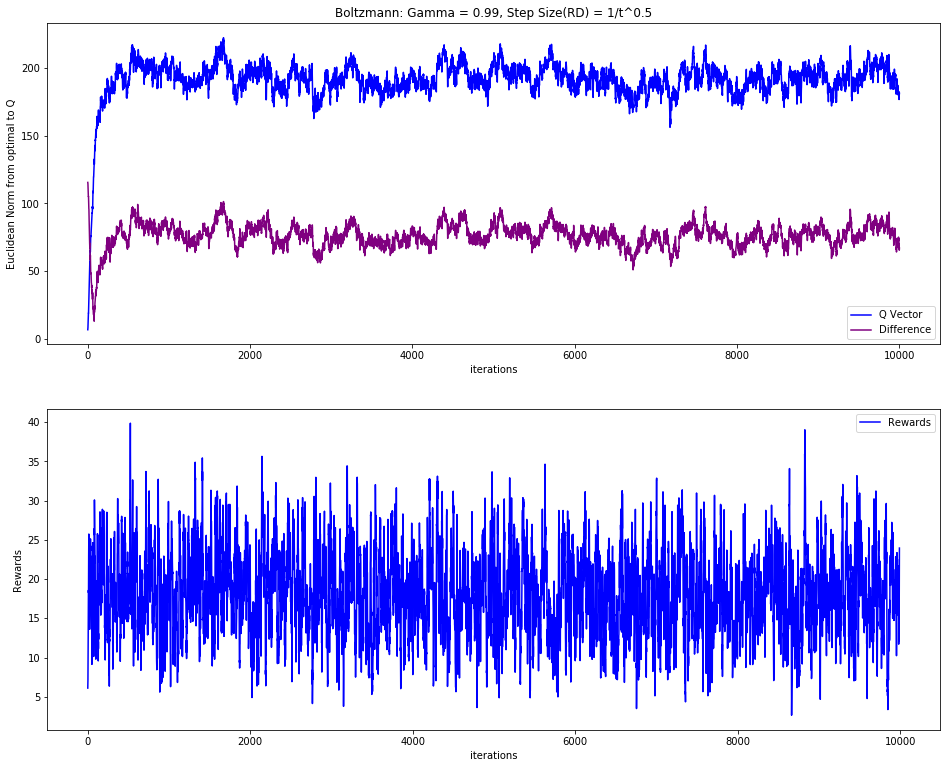

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
import mdptoolbox.example
import numpy as np
import sys
import time
import timeit
import warnings
warnings.filterwarnings('ignore')

class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.terminal              = 10
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        #print(self.rewards)
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.rewards                           = np.array([[0.997994,   0.98788917, 0.60332299, 0.12802087, 0.58319283, 0.00206464,  0.19891133, 0.95612316, 0.33044057, 0.63839011, 0], [0.94782189, 0.72855873, 0.32965116, 0.79176142, 0.10816552, 0.39231894, 0.22121813, 0.68372645, 0.10244628, 0.39702583, 0], [0.50634292, 0.34989768, 0.70641058, 0.02457702, 0.63398692, 0.23057129, 0.26870903, 0.8002556, 0.95556839, 0.31655021, 0]])
        self.transitions = np.array([[[0.11847748, 0.19305238, 0.01481604, 0.01817262, 0, 0.17366014, 0, 0.18145908, 0.20411116, 0, 0.09625109],  [0, 0, 0,  0,  0.46826678, 0.36019586,  0, 0, 0.17153736, 0, 0],  [0.07475531, 0, 0.01508056, 0.16279467, 0.13320348, 0.06239095, 0.12301144, 0, 0.13540043, 0.21847012, 0.07489302],  
                                      [0.13814029, 0.06730593, 0, 0.09866972, 0.14967253, 0.11755563, 0, 0.08509865, 0.16229298, 0.10931584, 0.07194841],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  [0.10880415, 0.15445165, 0.04159541, 0.10569029, 0.13451247, 0.11685767, 0.1501084,  0.08625954, 0.0330554,  0.03461996, 0.03404507],  
                                      [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0.1601253,  0.00675311, 0.16565002, 0.0205337,  0.04822082, 0.16615123, 0.16225705, 0.01011529, 0.0463817,  0.06362496, 0.15018681],  [0,0, 0, 1, 0, 0, 0, 0, 0,  0, 0],  [0,0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                     [[0, 0.11117147, 0.16656168, 0.16435951, 0.07849603, 0.12768003, 0.13023147, 0.05386311, 0.02101482, 0.07788199, 0.06873988],  [0.01079174, 0.07328504, 0.19653109, 0.19074128, 0, 0.08700166, 0.0739198,  0.1895154,  0.01665032, 0.16156368, 0],  [0, 0, 0.71010626, 0, 0, 0, 0.28989374, 0, 0, 0, 0],  
                                      [0.16263389, 0.02465111, 0.04295112, 0.03578322, 0.0962801,  0.16199941, 0.04532637, 0.16105695, 0.0042332,  0.14743767,0.11764696],  [0, 0, 0, 0.21932919, 0.14193876, 0.1975735, 0.06037827, 0, 0, 0, 0.38078027],  [0,  0, 0, 0, 0, 0.589443, 0, 0.410557, 0, 0, 0],  
                                      [0.05534813, 0, 0, 0.09460149, 0, 0.17626906, 0.19154841, 0, 0.28632051, 0.19591239, 0],  [0, 0.06855014, 0.16443767, 0.04956623, 0, 0, 0.08290543, 0, 0.52616951, 0.10837102, 0],  [0.59207374, 0, 0, 0.29608389, 0, 0, 0.03603537, 0.075807,  0, 0, 0],  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  
                                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                     [[0.115062, 0.30149332, 0.32352258, 0, 0.12897445, 0, 0, 0, 0, 0.07410246, 0.05684518],  [0, 0, 0, 0.01559824, 0, 0.15924881, 0, 0.31567349, 0, 0.37221513, 0.13726433],  [0, 0, 0, 0, 0, 0, 0.04173234, 0, 0.60469014, 0.35357751, 0],  [0.43253734, 0.06637228, 0.11537205, 0, 0, 0, 0, 0.23920235, 0.14651598, 0, 0],  
                                      [0.11651935, 0, 0.09736477, 0.05912902, 0.0166053,  0.24496303,  0.25685277, 0.03358916, 0.09352876, 0.04903922, 0.03240864],  [0.04183482, 0.19949461, 0.34397351, 0.12508018, 0.06331242, 0.13853659, 0, 0.05888664, 0, 0.02888122, 0],  [0, 0, 0.38278206, 0.31992955, 0.07684582, 0, 0.22044257, 0, 0,  0, 0],  
                                      [0.00632422, 0, 0, 0, 0, 0.32682937, 0, 0, 0.59930853, 0, 0.06753787],  [0.23875881, 0.17353509, 0.18098514, 0, 0, 0.09674519, 0, 0, 0, 0.0165584,  0.29341737],  [0, 0, 0, 0,0, 0, 0, 0, 0, 0, 1],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]])
        
        
#having a min epsilon of 0.1 makes sure that no matter what there is some exploration so that if the epsilon decays too fast the enviornment is not dependent on its previous knowledge
class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 20000, max_steps = 100,min_alpha=0.0, min_epsilon= 0.1, epsilon = 1.00, gamma = 0.99, decay = 25, solved=False):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        self.decay = decay  #works for most numbers between 5 and 35
        self.env = env #gym.make('CartPole-v0')
        self.QTable = np.ones((env.num_state, env.num_action))
        self.zeros = np.full((env.num_state, env.num_action), 0)
        self.QFunction = np.array([[22.64548446, 23.21740539, 23.11992163], [24.79556787, 24.64276343, 21.08847243], [22.42808202, 24.28306143, 24.28723371], [22.10055134, 21.79339319, 23.56944243], [ 0.58319283, 14.81946177, 23.67946435], [23.01378582, 24.71033772, 24.25958094], [23.62645803, 23.9339434,  23.97032516], [21.15633866, 24.35306117, 22.98125129], [23.66418858, 23.30295797, 17.8162478 ], [24.0659368, 23.73077384,  0.31655021], [ 0,          0,          0        ]])
        self.tau = 100000    # tau --> 0 pure exploitation tau --> infinity pure exploration
        self.tau_decay = True
        self.decay_factor_tau = 1.5 
        
        
    def action(self, state, tau):
        qList = self.QTable[state] #moves = self.q_matrix[pos_index]
        self.actions = [i for i in range(0, self.env.num_action)]
        # Circumvent math issues with temperature actually being 0
        if self.tau > 0.0:
            #print(self.tau)
            # Compute action probabilities using tau; when
            # tau is high, we're treating values of very different
            # Q-values as more equally choosable
            action_probs_numes = []
            denom = 0
            for q in qList:
                val = math.exp(q / self.tau)
                action_probs_numes.append(val)
                denom += val  # summation of the values
            action_probs = []
            for x in action_probs_numes:
                probs = x / denom 
                action_probs.append(probs)    
            # Pick random move, in which moves with higher probability are
            # more likely to be chosen, but it is obviously not guaranteed
            prob_sum = 0
            action = random.choices(self.actions, weights=action_probs, k=1)[0] # the weights give a weight to correspond 
            #for each action , and then chooses a random action with each action weighted by it prob. and then chooses
            #I attemped using the action for the max probabilty but it only returned one action each time
        else:
            # Here, we're totally cold; meaning, we're just exploiting
            action = np.argmax(self.QTable[state])
        return action
    
    def action_policy(self, state, policy):
        return policy[state]
    
    def decay_tau(self, t):          
        if self.tau_decay is True:
            #print(t)
            new_tau = self.tau - self.decay_factor_tau
        if new_tau < 1.0:
            self.tau = 1.0
        else:
            self.tau = new_tau
        return new_tau 

    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
#1-ln(time unit/decay)
    def learning(self):
        rewards = []
        alphaList = []
        epsilonList = []
        QList = []
        Q = []
        tt=0
        r = 0
        q = 0
        for e in range(self.max_episodes): 
            state = np.random.randint(0, self.env.num_state)
            if e % 10000 == 0:
                print(e)
            epsilon = self.decay_tau(e)
            step_size = 1 #self.decay_step_size(e)
            r = 0
            for t in range(self.max_steps):
                step_size = self.decay_step_size(t)
                if e % 2 == 0:
                    action = self.action(state, epsilon)
                if e % 2 == 1:
                    action = self.action_policy(state, policy)
                transitionVector = self.env.transitions[action][state]
                new_state = random.choices(population=self.env.states, weights=list(transitionVector))
                new_state = new_state[0]
                reward = self.env.rewards[action][state]
                self.Q_Update(state, action, reward, new_state, step_size)
                r+=reward
                state = new_state
                if state == 10:
                    break
            stateTuple = list()
            stateList = []
            actionsList = []
            states = []
            for list1 in self.QTable:
                actions = np.argmax(list1)
                actionsList.append(actions)
            observations = np.argwhere(self.QTable>=0)
            for obsList in observations:
                stateTuple = (obsList[0])
                stateList.append(stateTuple)
            del stateList[1::3]
            del stateList[1::2]
            policy = dict(zip(stateList, actionsList))
            if e % 2 == 1:
                rewards.append(r)
                QList.append(np.linalg.norm(self.QTable))# - self.QFunction))
                Q.append(np.linalg.norm(self.QTable - self.QFunction))
                alphaList.append(step_size)
                epsilonList.append(epsilon)
        return rewards, QList, Q
    
    def moving_average(self, rewards, window_size = 10): #A specified window size determines the size of each subset
        sum_vec = np.cumsum(np.insert(rewards, 0, 0))  
        moving_ave = (sum_vec[window_size:] - sum_vec[:-window_size]) / window_size  #formula for moving average
        return moving_ave    

if __name__ == '__main__':
    start_time = time.time()
    env = MarkovDP(11,3)
    env.initialize_mdp()
    solve = Qlearning(env)#MarkovDP)
    reward, QList, Q = solve.learning()
    #print(min(Q))
    ave = solve.moving_average(reward)
    #print(min(QList))
    print("--- %s seconds ---" % (time.time() - start_time))
    fig = plt.figure(figsize=(16,13))
    """ax1 = fig.add_subplot(311)
    ax1.plot(epsilon,  # epsilon_hist,
             color='b',
             label='Epsilon')
    ax1.set(title='Epsilon Plot',
            ylabel='Epsilon',
            xlabel='episodes')"""
    ax2 = fig.add_subplot(211)
    ax2.plot(QList,  
             color='b',
             label='Q Vector')
    ax2.plot(Q, 
             color='purple',
             label='Difference')
    ax2.set(title='Boltzmann: Gamma = 0.99, Step Size(RD) = 1/t^0.5', 
            ylabel='Euclidean Norm from optimal to Q',
            xlabel='iterations')
    ax3 = fig.add_subplot(212)
    ax3.plot(ave,  
             color='b',
             label='Rewards')
    ax3.set(title='',   #Epsilon Greedy: Gamma = 0.95, Step Size = 0.01', 
            ylabel='Rewards',
            xlabel='iterations')
    """ax3 = fig.add_subplot(313)
    ax3.plot(rewards,  # epsilon_hist,
             color='b',
             label='rewards')
    ax3.set(title='10x3 MDP',
            ylabel='Rewards',
            xlabel='episodes')"""
    fig.subplots_adjust(hspace=0.2)
    #ax1.legend(loc='best')
    ax2.legend(loc='best')
    ax3.legend(loc='best')

    plt.show()


# UP

0
10000
--- 21.796684980392456 seconds ---


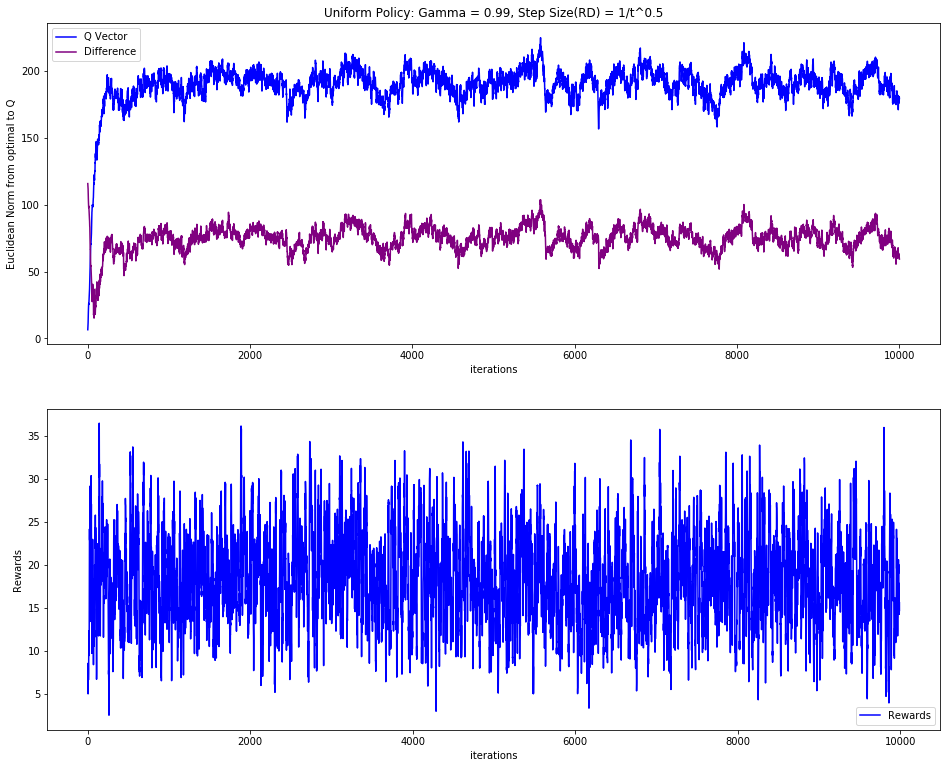

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
import mdptoolbox.example
import numpy as np
import sys
import time
import time
import timeit
import warnings
warnings.filterwarnings('ignore')

class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.terminal              = 10
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        #print(self.rewards)
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.rewards                           = np.array([[0.997994,   0.98788917, 0.60332299, 0.12802087, 0.58319283, 0.00206464,  0.19891133, 0.95612316, 0.33044057, 0.63839011, 0], [0.94782189, 0.72855873, 0.32965116, 0.79176142, 0.10816552, 0.39231894, 0.22121813, 0.68372645, 0.10244628, 0.39702583, 0], [0.50634292, 0.34989768, 0.70641058, 0.02457702, 0.63398692, 0.23057129, 0.26870903, 0.8002556, 0.95556839, 0.31655021, 0]])
        self.transitions = np.array([[[0.11847748, 0.19305238, 0.01481604, 0.01817262, 0, 0.17366014, 0, 0.18145908, 0.20411116, 0, 0.09625109],  [0, 0, 0,  0,  0.46826678, 0.36019586,  0, 0, 0.17153736, 0, 0],  [0.07475531, 0, 0.01508056, 0.16279467, 0.13320348, 0.06239095, 0.12301144, 0, 0.13540043, 0.21847012, 0.07489302],  
                                      [0.13814029, 0.06730593, 0, 0.09866972, 0.14967253, 0.11755563, 0, 0.08509865, 0.16229298, 0.10931584, 0.07194841],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  [0.10880415, 0.15445165, 0.04159541, 0.10569029, 0.13451247, 0.11685767, 0.1501084,  0.08625954, 0.0330554,  0.03461996, 0.03404507],  
                                      [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0.1601253,  0.00675311, 0.16565002, 0.0205337,  0.04822082, 0.16615123, 0.16225705, 0.01011529, 0.0463817,  0.06362496, 0.15018681],  [0,0, 0, 1, 0, 0, 0, 0, 0,  0, 0],  [0,0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                     [[0, 0.11117147, 0.16656168, 0.16435951, 0.07849603, 0.12768003, 0.13023147, 0.05386311, 0.02101482, 0.07788199, 0.06873988],  [0.01079174, 0.07328504, 0.19653109, 0.19074128, 0, 0.08700166, 0.0739198,  0.1895154,  0.01665032, 0.16156368, 0],  [0, 0, 0.71010626, 0, 0, 0, 0.28989374, 0, 0, 0, 0],  
                                      [0.16263389, 0.02465111, 0.04295112, 0.03578322, 0.0962801,  0.16199941, 0.04532637, 0.16105695, 0.0042332,  0.14743767,0.11764696],  [0, 0, 0, 0.21932919, 0.14193876, 0.1975735, 0.06037827, 0, 0, 0, 0.38078027],  [0,  0, 0, 0, 0, 0.589443, 0, 0.410557, 0, 0, 0],  
                                      [0.05534813, 0, 0, 0.09460149, 0, 0.17626906, 0.19154841, 0, 0.28632051, 0.19591239, 0],  [0, 0.06855014, 0.16443767, 0.04956623, 0, 0, 0.08290543, 0, 0.52616951, 0.10837102, 0],  [0.59207374, 0, 0, 0.29608389, 0, 0, 0.03603537, 0.075807,  0, 0, 0],  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  
                                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                     [[0.115062, 0.30149332, 0.32352258, 0, 0.12897445, 0, 0, 0, 0, 0.07410246, 0.05684518],  [0, 0, 0, 0.01559824, 0, 0.15924881, 0, 0.31567349, 0, 0.37221513, 0.13726433],  [0, 0, 0, 0, 0, 0, 0.04173234, 0, 0.60469014, 0.35357751, 0],  [0.43253734, 0.06637228, 0.11537205, 0, 0, 0, 0, 0.23920235, 0.14651598, 0, 0],  
                                      [0.11651935, 0, 0.09736477, 0.05912902, 0.0166053,  0.24496303,  0.25685277, 0.03358916, 0.09352876, 0.04903922, 0.03240864],  [0.04183482, 0.19949461, 0.34397351, 0.12508018, 0.06331242, 0.13853659, 0, 0.05888664, 0, 0.02888122, 0],  [0, 0, 0.38278206, 0.31992955, 0.07684582, 0, 0.22044257, 0, 0,  0, 0],  
                                      [0.00632422, 0, 0, 0, 0, 0.32682937, 0, 0, 0.59930853, 0, 0.06753787],  [0.23875881, 0.17353509, 0.18098514, 0, 0, 0.09674519, 0, 0, 0, 0.0165584,  0.29341737],  [0, 0, 0, 0,0, 0, 0, 0, 0, 0, 1],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]])
        
        
class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 20000, max_steps = 100,min_alpha=0.0, min_epsilon= 0.1, epsilon = 1.00, gamma = 0.99, decay = 25, solved=False):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_alpha = min_alpha
        self.min_epsilon = min_epsilon 
        self.solved = solved
        self.gamma = gamma
        self.decay = decay  #works for most numbers between 5 and 35
        self.env = env #gym.make('CartPole-v0')
        self.QTable = np.ones((env.num_state, env.num_action))
        self.zeros = np.full((env.num_state, env.num_action), 0)
        self.QFunction = np.array([[22.64548446, 23.21740539, 23.11992163], [24.79556787, 24.64276343, 21.08847243], [22.42808202, 24.28306143, 24.28723371], [22.10055134, 21.79339319, 23.56944243], [ 0.58319283, 14.81946177, 23.67946435], [23.01378582, 24.71033772, 24.25958094], [23.62645803, 23.9339434,  23.97032516], [21.15633866, 24.35306117, 22.98125129], [23.66418858, 23.30295797, 17.8162478 ], [24.0659368, 23.73077384,  0.31655021], [ 0,          0,          0        ]])
        
    def action(self, state, epsilon):
        ''' choose an action using the epsilon policy '''
        action = random.choice(self.env.actions)
        action = list(self.env.actions).index(action)
        return action
    
    def action_policy(self, state, policy):
        return policy[state]

    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
    def learning(self):
        rewards = []
        alphaList = []
        epsilonList = []
        QList = []
        Q = []
        tt=0
        r = 0
        q = 0
        for e in range(self.max_episodes): 
            state = np.random.randint(0, self.env.num_state)
            if e % 10000 == 0:
                print(e)
            epsilon = self.decay_epsilon() #e)
            step_size = 1 #self.decay_step_size(e)
            r = 0
            for t in range(self.max_steps):
                step_size = self.decay_step_size(t)
                if e % 2 == 0:
                    action = self.action(state, epsilon)
                if e % 2 == 1:
                    action = self.action_policy(state, policy)
                transitionVector = self.env.transitions[action][state]
                new_state = random.choices(population=self.env.states, weights=list(transitionVector))
                new_state = new_state[0]
                reward = self.env.rewards[action][state]
                #print(reward)
                self.Q_Update(state, action, reward, new_state, step_size)
                r+=reward
                state = new_state
                if state == 10:
                    break
            stateTuple = list()
            stateList = []
            actionsList = []
            states = []
            for list1 in self.QTable:
                actions = np.argmax(list1)
                actionsList.append(actions)
            observations = np.argwhere(self.QTable>=0)
            for obsList in observations:
                stateTuple = (obsList[0])
                stateList.append(stateTuple)
            del stateList[1::3]
            del stateList[1::2]
            policy = dict(zip(stateList, actionsList))
            if e % 2 == 1:
                rewards.append(r)
                QList.append(np.linalg.norm(self.QTable))# - self.QFunction))
                Q.append(np.linalg.norm(self.QTable - self.QFunction))
                alphaList.append(step_size)
                epsilonList.append(epsilon)
        return rewards, QList, Q
    
    def moving_average(self, rewards, window_size = 10): #A specified window size determines the size of each subset
        sum_vec = np.cumsum(np.insert(rewards, 0, 0))  
        moving_ave = (sum_vec[window_size:] - sum_vec[:-window_size]) / window_size  #formula for moving average
        return moving_ave    

if __name__ == '__main__':
    ''' Run main program. '''
    start_time = time.time()
    env = MarkovDP(11,3)
    env.initialize_mdp()
    solve = Qlearning(env)#MarkovDP)
    reward, QList, Q = solve.learning()
    #print(min(Q))
    ave = solve.moving_average(reward)
    #print(min(QList))
    print("--- %s seconds ---" % (time.time() - start_time))
    fig = plt.figure(figsize=(16,13))
    """ax1 = fig.add_subplot(311)
    ax1.plot(epsilon,  # epsilon_hist,
             color='b',
             label='Epsilon')
    ax1.set(title='Epsilon Plot',
            ylabel='Epsilon',
            xlabel='episodes')"""
    ax2 = fig.add_subplot(211)
    ax2.plot(QList,  
             color='b',
             label='Q Vector')
    ax2.plot(Q, 
             color='purple',
             label='Difference')
    ax2.set(title='Uniform Policy: Gamma = 0.99, Step Size(RD) = 1/t^0.5', 
            ylabel='Euclidean Norm from optimal to Q',
            xlabel='iterations')
    ax3 = fig.add_subplot(212)
    ax3.plot(ave,  
             color='b',
             label='Rewards')
    ax3.set(title='', 
            ylabel='Rewards',
            xlabel='iterations')
    """ax3 = fig.add_subplot(313)
    ax3.plot(rewards,  # epsilon_hist,
             color='b',
             label='rewards')
    ax3.set(title='10x3 MDP',
            ylabel='Rewards',
            xlabel='episodes')"""
    fig.subplots_adjust(hspace=0.2)
    #ax1.legend(loc='best')
    ax2.legend(loc='best')
    ax3.legend(loc='best')

    plt.show()


# Policy Comparison

# Difference: Constant

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
EPSILON GREEDY POLICY MINIMUM: 1.9827083779830161
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
BOLTZMANN POLICY MINIMUM: 2.241974082191115
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
UNIFORM POLICY MINIMUM: 1.863257322502755
--- 752.3349740505219 seconds ---


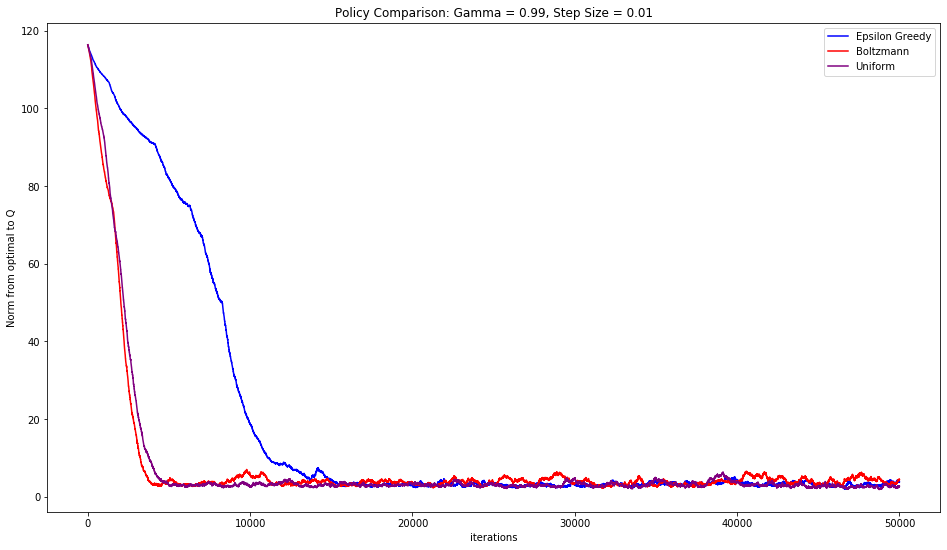

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
import mdptoolbox.example
import numpy as np
import sys
import time
import time
import timeit
import warnings
warnings.filterwarnings('ignore')

class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.terminal              = 10
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        #print(rewards)
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.rewards                           = np.array([[0.997994,   0.98788917, 0.60332299, 0.12802087, 0.58319283, 0.00206464,  0.19891133, 0.95612316, 0.33044057, 0.63839011, 0], [0.94782189, 0.72855873, 0.32965116, 0.79176142, 0.10816552, 0.39231894, 0.22121813, 0.68372645, 0.10244628, 0.39702583, 0], [0.50634292, 0.34989768, 0.70641058, 0.02457702, 0.63398692, 0.23057129, 0.26870903, 0.8002556, 0.95556839, 0.31655021, 0]])
        self.transitions = np.array([[[0.11847748, 0.19305238, 0.01481604, 0.01817262, 0, 0.17366014, 0, 0.18145908, 0.20411116, 0, 0.09625109],  [0, 0, 0,  0,  0.46826678, 0.36019586,  0, 0, 0.17153736, 0, 0],  [0.07475531, 0, 0.01508056, 0.16279467, 0.13320348, 0.06239095, 0.12301144, 0, 0.13540043, 0.21847012, 0.07489302],  
                                      [0.13814029, 0.06730593, 0, 0.09866972, 0.14967253, 0.11755563, 0, 0.08509865, 0.16229298, 0.10931584, 0.07194841],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  [0.10880415, 0.15445165, 0.04159541, 0.10569029, 0.13451247, 0.11685767, 0.1501084,  0.08625954, 0.0330554,  0.03461996, 0.03404507],  
                                      [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0.1601253,  0.00675311, 0.16565002, 0.0205337,  0.04822082, 0.16615123, 0.16225705, 0.01011529, 0.0463817,  0.06362496, 0.15018681],  [0,0, 0, 1, 0, 0, 0, 0, 0,  0, 0],  [0,0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                     [[0, 0.11117147, 0.16656168, 0.16435951, 0.07849603, 0.12768003, 0.13023147, 0.05386311, 0.02101482, 0.07788199, 0.06873988],  [0.01079174, 0.07328504, 0.19653109, 0.19074128, 0, 0.08700166, 0.0739198,  0.1895154,  0.01665032, 0.16156368, 0],  [0, 0, 0.71010626, 0, 0, 0, 0.28989374, 0, 0, 0, 0],  
                                      [0.16263389, 0.02465111, 0.04295112, 0.03578322, 0.0962801,  0.16199941, 0.04532637, 0.16105695, 0.0042332,  0.14743767,0.11764696],  [0, 0, 0, 0.21932919, 0.14193876, 0.1975735, 0.06037827, 0, 0, 0, 0.38078027],  [0,  0, 0, 0, 0, 0.589443, 0, 0.410557, 0, 0, 0],  
                                      [0.05534813, 0, 0, 0.09460149, 0, 0.17626906, 0.19154841, 0, 0.28632051, 0.19591239, 0],  [0, 0.06855014, 0.16443767, 0.04956623, 0, 0, 0.08290543, 0, 0.52616951, 0.10837102, 0],  [0.59207374, 0, 0, 0.29608389, 0, 0, 0.03603537, 0.075807,  0, 0, 0],  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  
                                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                     [[0.115062, 0.30149332, 0.32352258, 0, 0.12897445, 0, 0, 0, 0, 0.07410246, 0.05684518],  [0, 0, 0, 0.01559824, 0, 0.15924881, 0, 0.31567349, 0, 0.37221513, 0.13726433],  [0, 0, 0, 0, 0, 0, 0.04173234, 0, 0.60469014, 0.35357751, 0],  [0.43253734, 0.06637228, 0.11537205, 0, 0, 0, 0, 0.23920235, 0.14651598, 0, 0],  
                                      [0.11651935, 0, 0.09736477, 0.05912902, 0.0166053,  0.24496303,  0.25685277, 0.03358916, 0.09352876, 0.04903922, 0.03240864],  [0.04183482, 0.19949461, 0.34397351, 0.12508018, 0.06331242, 0.13853659, 0, 0.05888664, 0, 0.02888122, 0],  [0, 0, 0.38278206, 0.31992955, 0.07684582, 0, 0.22044257, 0, 0,  0, 0],  
                                      [0.00632422, 0, 0, 0, 0, 0.32682937, 0, 0, 0.59930853, 0, 0.06753787],  [0.23875881, 0.17353509, 0.18098514, 0, 0, 0.09674519, 0, 0, 0, 0.0165584,  0.29341737],  [0, 0, 0, 0,0, 0, 0, 0, 0, 0, 1],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]])

        
class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 100000, printMod = 10000, max_steps = 100, min_epsilon= 0.1, epsilon = 1.00, gamma = 0.99, step = 0.01, tau = 100000, tau_decay = True, decay_factor_tau = 1.5):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_epsilon = min_epsilon 
        self.gamma = gamma
        self.step = step
        self.printMod =  printMod
        self.env = env #gym.make('CartPole-v0')
        self.num_state = self.env.num_state
        self.num_action = self.env.num_action
        self.states = self.env.states
        self.actions = self.env.actions
        self.transitions = self.env.transitions
        self.rewards = self.env.rewards
        self.QTable = np.ones((env.num_state, env.num_action))
        self.zeros = np.full((10,3), 0)
        self.QFunction = np.array([[22.64548446, 23.21740539, 23.11992163], [24.79556787, 24.64276343, 21.08847243], [22.42808202, 24.28306143, 24.28723371], [22.10055134, 21.79339319, 23.56944243], [ 0.58319283, 14.81946177, 23.67946435], [23.01378582, 24.71033772, 24.25958094], [23.62645803, 23.9339434,  23.97032516], [21.15633866, 24.35306117, 22.98125129], [23.66418858, 23.30295797, 17.8162478 ], [24.0659368, 23.73077384,  0.31655021], [ 0,          0,          0        ]])
        self.tau = tau    # tau --> 0 pure exploitation tau --> infinity pure exploration
        self.tau_decay = tau_decay
        self.decay_factor_tau = decay_factor_tau          

    def epsilon_action(self, state, epsilon):
        ''' choose an action using the epsilon policy '''
        if np.random.random() <= epsilon:
            #print(self.env.actions)
            action = random.choice(self.env.actions)
            action = list(self.env.actions).index(action)
        else:
            action = np.argmax(self.QTable[state])  # exploitation
        return action
    
    def boltzmann_action(self, state, tau):
        qList = self.QTable[state] #moves = self.q_matrix[pos_index]
        self.actions = [i for i in range(0, self.env.num_action)]
        # Circumvent math issues with temperature actually being 0
        if self.tau > 0.0:
            # Compute action probabilities using tau; when
            # tau is high, we're treating values of very different
            # Q-values as more equally choosable
            action_probs_numes = []
            denom = 0
            for q in qList:
                val = math.exp(q / self.tau)
                action_probs_numes.append(val)
                denom += val  # summation of the values
            action_probs = []
            for x in action_probs_numes:
                probs = x / denom 
                action_probs.append(probs)    
            # Pick random move, in which moves with higher probability are
            # more likely to be chosen, but it is obviously not guaranteed
            prob_sum = 0
            action = random.choices(self.actions, weights=action_probs, k=1)[0] # the weights give a weight to correspond 
            #for each action , and then chooses a random action with each action weighted by it prob. and then chooses
            #I attemped using the action for the max probabilty but it only returned one action each time
        else:
            # Here, we're totally cold; meaning, we're just exploiting
            action = np.argmax(self.QTable[state])
        return action
    
    def uniform_action(self, state):
        ''' choose an action using the epsilon policy '''
        action = random.choice(self.env.actions)
        action = list(self.env.actions).index(action)
        return action
    
    def action_policy(self, state, policy):
        return policy[state]

    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
    def decay_tau(self, t):          
        if self.tau_decay is True:
            #print(t)
            new_tau = self.tau - self.decay_factor_tau
        if new_tau < 1.0:
            self.tau = 1.0
        else:
            self.tau = new_tau
        return new_tau 
    
def epsilon_learning(Qlearning):
    rewards = []
    alphaList = []
    epsilonList = []
    QList = []
    Q = []
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):  
        if e % Qlearning.printMod == 0:
            print(e)
        epsilon = Qlearning.decay_epsilon()
        step_size = Qlearning.step #0.01 #self.decay_step_size(e)
        state = np.random.randint(0, Qlearning.num_state)
        r = 0
        for t in range(Qlearning.max_steps):
            if e % 2 == 0:
                action = Qlearning.epsilon_action(state, epsilon)
            if e % 2 == 1:
                action = Qlearning.action_policy(state, policy)
            transitionVector = Qlearning.transitions[action][state]
            new_state = random.choices(population=Qlearning.states, weights=list(transitionVector))
            new_state = new_state[0]
            reward = Qlearning.rewards[action][state]
            Qlearning.Q_Update(state, action, reward, new_state, step_size)
            r+=reward
            state = new_state 
            if state == 10:
                break
        stateTuple = list()
        stateList = []
        actionsList = []
        states = []
        for list1 in Qlearning.QTable:
            actions = np.argmax(list1)
            actionsList.append(actions)
        observations = np.argwhere(Qlearning.QTable>=0)
        for obsList in observations:
            stateTuple = (obsList[0])
            stateList.append(stateTuple)
        del stateList[1::3]
        del stateList[1::2]
        policy = dict(zip(stateList, actionsList))
        #print(policy)
        if e % 2 == 1:
            rewards.append(r)
            QList.append(np.linalg.norm(Qlearning.QTable - Qlearning.QFunction)) # - Qlearning.QFunction))
            alphaList.append(step_size)
            epsilonList.append(epsilon)
    return QList

def boltzmann_learning(Qlearning): 
    rewards = []
    alphaList = []
    epsilonList = []
    QList = []
    Q = []
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):  
        if e % Qlearning.printMod == 0:
            print(e)
        tau = Qlearning.decay_tau(e)
        step_size = Qlearning.step #0.01
        state = np.random.randint(0, Qlearning.num_state)
        r = 0
        for t in range(Qlearning.max_steps):
            if e % 2 == 0:
                action = Qlearning.boltzmann_action(state, tau)
            if e % 2 == 1:
                action = Qlearning.action_policy(state, policy)
            transitionVector = Qlearning.transitions[action][state]
            new_state = random.choices(population=Qlearning.states, weights=list(transitionVector))
            new_state = new_state[0]
            reward = Qlearning.rewards[action][state]
            Qlearning.Q_Update(state, action, reward, new_state, step_size)
            r+=reward
            state = new_state 
            if state == 10:
                #print("e", e)
                break
        stateTuple = list()
        stateList = []
        actionsList = []
        states = []
        #print(self.QTable)
        for list1 in Qlearning.QTable:
            actions = np.argmax(list1)
            actionsList.append(actions)
        observations = np.argwhere(Qlearning.QTable>=0)
        for obsList in observations:
            stateTuple = (obsList[0])
            stateList.append(stateTuple)
        #print(stateList)
        del stateList[1::3]
        del stateList[1::2]
        policy = dict(zip(stateList, actionsList))
        #print(policy)
        if e % 2 == 1:
            rewards.append(r)
            QList.append(np.linalg.norm(Qlearning.QTable - Qlearning.QFunction))  # - Qlearning.QFunction))
            alphaList.append(step_size)
            epsilonList.append(tau)
    return QList
def uniform_learning(Qlearning): 
    rewards = []
    alphaList = []
    epsilonList = []
    QList = []
    Q = []
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):  
        if e % Qlearning.printMod == 0:
            print(e)
        step_size = Qlearning.step #0.01 #self.decay_step_size(e)
        state = np.random.randint(0, Qlearning.num_state)
        r = 0
        for t in range(Qlearning.max_steps):
            if e % 2 == 0:
                action = Qlearning.uniform_action(state)
            if e % 2 == 1:
                action = Qlearning.action_policy(state, policy)
            transitionVector = Qlearning.transitions[action][state]
            new_state = random.choices(population=Qlearning.states, weights=list(transitionVector))
            new_state = new_state[0]
            reward = Qlearning.rewards[action][state]
            Qlearning.Q_Update(state, action, reward, new_state, step_size)
            r+=reward
            state = new_state 
            if state == 10:
                break
        stateTuple = list()
        stateList = []
        actionsList = []
        states = []
        for list1 in Qlearning.QTable:
            actions = np.argmax(list1)
            actionsList.append(actions)
        observations = np.argwhere(Qlearning.QTable>=0)
        for obsList in observations:
            stateTuple = (obsList[0])
            stateList.append(stateTuple)
        del stateList[1::3]
        del stateList[1::2]
        policy = dict(zip(stateList, actionsList))
        if e % 2 == 1:
            rewards.append(r)
            QList.append(np.linalg.norm(Qlearning.QTable - Qlearning.QFunction))
    return QList


if __name__ == '__main__':
    ''' Run main program. '''
    start_time = time.time()
    env = MarkovDP(11,3)
    env.initialize_mdp()
    solve = Qlearning(env) #MarkovDP)
    EG = epsilon_learning(solve)
    print("EPSILON GREEDY POLICY MINIMUM:", min(EG))
    solve = Qlearning(env)
    BP = boltzmann_learning(solve)
    print("BOLTZMANN POLICY MINIMUM:", min(BP))
    solve = Qlearning(env)
    UP = uniform_learning(solve)
    print("UNIFORM POLICY MINIMUM:", min(UP))
    #QList, QLog = solve.learning()
    print("--- %s seconds ---" % (time.time() - start_time))
    fig = plt.figure(figsize=(16,9))
    plt1 = fig.add_subplot(111)
    plt1.plot(EG,  # epsilon_hist,
             color='b',
             label='Epsilon Greedy')
    plt1.plot(BP,  # epsilon_hist,
             color='r',
             label='Boltzmann')
    plt1.plot(UP,  # epsilon_hist,
             color='purple',
             label='Uniform')
    plt1.set(title='Policy Comparison: Gamma = 0.99, Step Size = 0.01', 
            ylabel='Norm from optimal to Q',
            xlabel='iterations')
    fig.subplots_adjust(hspace=0.7)
    #ax1.legend(loc='best')
    plt1.legend(loc='best')
    #ax3.legend(loc='best')

    plt.show()

# Log

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
EPSILON GREEDY POLICY MINIMUM: 0.35132851031717777
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
BOLTZMANN POLICY MINIMUM: 0.33067675066963875
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
UNIFORM POLICY MINIMUM: 0.2918249907003502
--- 649.3395006656647 seconds ---


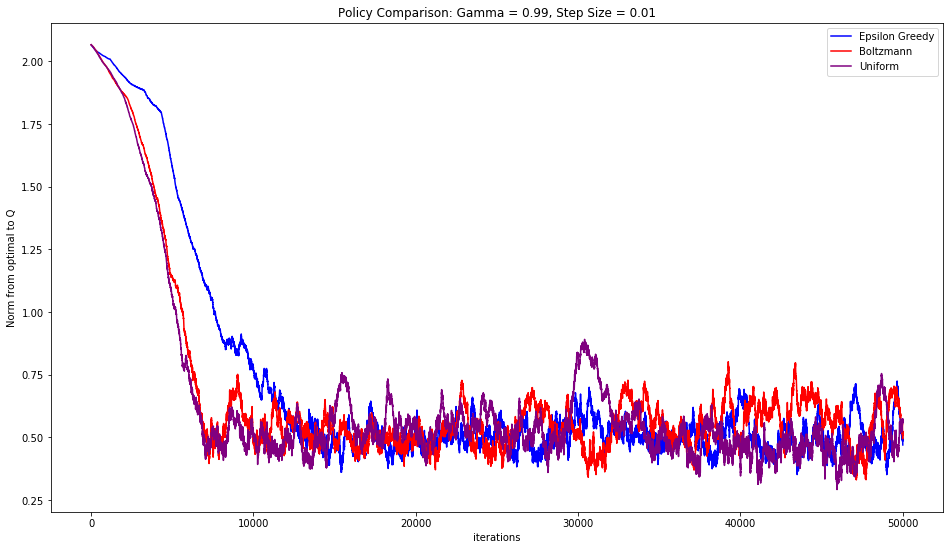

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
import mdptoolbox.example
import numpy as np
import sys
import time
import time
import timeit
import warnings
warnings.filterwarnings('ignore')

class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.terminal              = 10
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        #print(rewards)
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.rewards                           = np.array([[0.997994,   0.98788917, 0.60332299, 0.12802087, 0.58319283, 0.00206464,  0.19891133, 0.95612316, 0.33044057, 0.63839011, 0], [0.94782189, 0.72855873, 0.32965116, 0.79176142, 0.10816552, 0.39231894, 0.22121813, 0.68372645, 0.10244628, 0.39702583, 0], [0.50634292, 0.34989768, 0.70641058, 0.02457702, 0.63398692, 0.23057129, 0.26870903, 0.8002556, 0.95556839, 0.31655021, 0]])
        self.transitions = np.array([[[0.11847748, 0.19305238, 0.01481604, 0.01817262, 0, 0.17366014, 0, 0.18145908, 0.20411116, 0, 0.09625109],  [0, 0, 0,  0,  0.46826678, 0.36019586,  0, 0, 0.17153736, 0, 0],  [0.07475531, 0, 0.01508056, 0.16279467, 0.13320348, 0.06239095, 0.12301144, 0, 0.13540043, 0.21847012, 0.07489302],  
                                      [0.13814029, 0.06730593, 0, 0.09866972, 0.14967253, 0.11755563, 0, 0.08509865, 0.16229298, 0.10931584, 0.07194841],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  [0.10880415, 0.15445165, 0.04159541, 0.10569029, 0.13451247, 0.11685767, 0.1501084,  0.08625954, 0.0330554,  0.03461996, 0.03404507],  
                                      [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0.1601253,  0.00675311, 0.16565002, 0.0205337,  0.04822082, 0.16615123, 0.16225705, 0.01011529, 0.0463817,  0.06362496, 0.15018681],  [0,0, 0, 1, 0, 0, 0, 0, 0,  0, 0],  [0,0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                     [[0, 0.11117147, 0.16656168, 0.16435951, 0.07849603, 0.12768003, 0.13023147, 0.05386311, 0.02101482, 0.07788199, 0.06873988],  [0.01079174, 0.07328504, 0.19653109, 0.19074128, 0, 0.08700166, 0.0739198,  0.1895154,  0.01665032, 0.16156368, 0],  [0, 0, 0.71010626, 0, 0, 0, 0.28989374, 0, 0, 0, 0],  
                                      [0.16263389, 0.02465111, 0.04295112, 0.03578322, 0.0962801,  0.16199941, 0.04532637, 0.16105695, 0.0042332,  0.14743767,0.11764696],  [0, 0, 0, 0.21932919, 0.14193876, 0.1975735, 0.06037827, 0, 0, 0, 0.38078027],  [0,  0, 0, 0, 0, 0.589443, 0, 0.410557, 0, 0, 0],  
                                      [0.05534813, 0, 0, 0.09460149, 0, 0.17626906, 0.19154841, 0, 0.28632051, 0.19591239, 0],  [0, 0.06855014, 0.16443767, 0.04956623, 0, 0, 0.08290543, 0, 0.52616951, 0.10837102, 0],  [0.59207374, 0, 0, 0.29608389, 0, 0, 0.03603537, 0.075807,  0, 0, 0],  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  
                                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                     [[0.115062, 0.30149332, 0.32352258, 0, 0.12897445, 0, 0, 0, 0, 0.07410246, 0.05684518],  [0, 0, 0, 0.01559824, 0, 0.15924881, 0, 0.31567349, 0, 0.37221513, 0.13726433],  [0, 0, 0, 0, 0, 0, 0.04173234, 0, 0.60469014, 0.35357751, 0],  [0.43253734, 0.06637228, 0.11537205, 0, 0, 0, 0, 0.23920235, 0.14651598, 0, 0],  
                                      [0.11651935, 0, 0.09736477, 0.05912902, 0.0166053,  0.24496303,  0.25685277, 0.03358916, 0.09352876, 0.04903922, 0.03240864],  [0.04183482, 0.19949461, 0.34397351, 0.12508018, 0.06331242, 0.13853659, 0, 0.05888664, 0, 0.02888122, 0],  [0, 0, 0.38278206, 0.31992955, 0.07684582, 0, 0.22044257, 0, 0,  0, 0],  
                                      [0.00632422, 0, 0, 0, 0, 0.32682937, 0, 0, 0.59930853, 0, 0.06753787],  [0.23875881, 0.17353509, 0.18098514, 0, 0, 0.09674519, 0, 0, 0, 0.0165584,  0.29341737],  [0, 0, 0, 0,0, 0, 0, 0, 0, 0, 1],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]])

        
class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 100000, printMod = 10000, max_steps = 100, min_epsilon= 0.1, epsilon = 1.00, gamma = 0.99, step = 0.01, tau = 100000, tau_decay = True, decay_factor_tau = 1.5):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_epsilon = min_epsilon 
        self.gamma = gamma
        self.step = step
        self.printMod =  printMod
        self.env = env #gym.make('CartPole-v0')
        self.num_state = self.env.num_state
        self.num_action = self.env.num_action
        self.states = self.env.states
        self.actions = self.env.actions
        self.transitions = self.env.transitions
        self.rewards = self.env.rewards
        self.QTable = np.ones((env.num_state, env.num_action))
        self.zeros = np.full((10,3), 0)
        self.QFunction = np.array([[22.64548446, 23.21740539, 23.11992163], [24.79556787, 24.64276343, 21.08847243], [22.42808202, 24.28306143, 24.28723371], [22.10055134, 21.79339319, 23.56944243], [ 0.58319283, 14.81946177, 23.67946435], [23.01378582, 24.71033772, 24.25958094], [23.62645803, 23.9339434,  23.97032516], [21.15633866, 24.35306117, 22.98125129], [23.66418858, 23.30295797, 17.8162478 ], [24.0659368, 23.73077384,  0.31655021], [ 0,          0,          0        ]])
        self.tau = tau    # tau --> 0 pure exploitation tau --> infinity pure exploration
        self.tau_decay = tau_decay
        self.decay_factor_tau = decay_factor_tau          

    def epsilon_action(self, state, epsilon):
        ''' choose an action using the epsilon policy '''
        if np.random.random() <= epsilon:
            #print(self.env.actions)
            action = random.choice(self.env.actions)
            action = list(self.env.actions).index(action)
        else:
            action = np.argmax(self.QTable[state])  # exploitation
        return action
    
    def boltzmann_action(self, state, tau):
        qList = self.QTable[state] #moves = self.q_matrix[pos_index]
        self.actions = [i for i in range(0, self.env.num_action)]
        # Circumvent math issues with temperature actually being 0
        if self.tau > 0.0:
            # Compute action probabilities using tau; when
            # tau is high, we're treating values of very different
            # Q-values as more equally choosable
            action_probs_numes = []
            denom = 0
            for q in qList:
                val = math.exp(q / self.tau)
                action_probs_numes.append(val)
                denom += val  # summation of the values
            action_probs = []
            for x in action_probs_numes:
                probs = x / denom 
                action_probs.append(probs)    
            # Pick random move, in which moves with higher probability are
            # more likely to be chosen, but it is obviously not guaranteed
            prob_sum = 0
            action = random.choices(self.actions, weights=action_probs, k=1)[0] # the weights give a weight to correspond 
            #for each action , and then chooses a random action with each action weighted by it prob. and then chooses
            #I attemped using the action for the max probabilty but it only returned one action each time
        else:
            # Here, we're totally cold; meaning, we're just exploiting
            action = np.argmax(self.QTable[state])
        return action
    
    def uniform_action(self, state):
        ''' choose an action using the epsilon policy '''
        action = random.choice(self.env.actions)
        action = list(self.env.actions).index(action)
        return action
    
    def action_policy(self, state, policy):
        return policy[state]

    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
    def decay_tau(self, t):          
        if self.tau_decay is True:
            #print(t)
            new_tau = self.tau - self.decay_factor_tau
        if new_tau < 1.0:
            self.tau = 1.0
        else:
            self.tau = new_tau
        return new_tau 
    
def epsilon_learning(Qlearning):
    rewards = []
    alphaList = []
    epsilonList = []
    QList = []
    Q = []
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):  
        if e % Qlearning.printMod == 0:
            print(e)
        epsilon = Qlearning.decay_epsilon()
        step_size = Qlearning.step #0.01 #self.decay_step_size(e)
        state = np.random.randint(0, Qlearning.num_state)
        r = 0
        for t in range(Qlearning.max_steps):
            if e % 2 == 0:
                action = Qlearning.epsilon_action(state, epsilon)
            if e % 2 == 1:
                action = Qlearning.action_policy(state, policy)
            transitionVector = Qlearning.transitions[action][state]
            new_state = random.choices(population=Qlearning.states, weights=list(transitionVector))
            new_state = new_state[0]
            reward = Qlearning.rewards[action][state]
            Qlearning.Q_Update(state, action, reward, new_state, step_size)
            r+=reward
            state = new_state 
            if state == 10:
                break
        stateTuple = list()
        stateList = []
        actionsList = []
        states = []
        for list1 in Qlearning.QTable:
            actions = np.argmax(list1)
            actionsList.append(actions)
        observations = np.argwhere(Qlearning.QTable>=0)
        for obsList in observations:
            stateTuple = (obsList[0])
            stateList.append(stateTuple)
        del stateList[1::3]
        del stateList[1::2]
        policy = dict(zip(stateList, actionsList))
        #print(policy)
        if e % 2 == 1:
            rewards.append(r)
            QList.append(math.log10(np.linalg.norm(Qlearning.QTable - Qlearning.QFunction))) # - Qlearning.QFunction))
            alphaList.append(step_size)
            epsilonList.append(epsilon)
    return QList

def boltzmann_learning(Qlearning): 
    rewards = []
    alphaList = []
    epsilonList = []
    QList = []
    Q = []
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):  
        if e % Qlearning.printMod == 0:
            print(e)
        tau = Qlearning.decay_tau(e)
        step_size = Qlearning.step #0.01
        state = np.random.randint(0, Qlearning.num_state)
        r = 0
        for t in range(Qlearning.max_steps):
            if e % 2 == 0:
                action = Qlearning.boltzmann_action(state, tau)
            if e % 2 == 1:
                action = Qlearning.action_policy(state, policy)
            transitionVector = Qlearning.transitions[action][state]
            new_state = random.choices(population=Qlearning.states, weights=list(transitionVector))
            new_state = new_state[0]
            reward = Qlearning.rewards[action][state]
            Qlearning.Q_Update(state, action, reward, new_state, step_size)
            r+=reward
            state = new_state 
            if state == 10:
                #print("e", e)
                break
        stateTuple = list()
        stateList = []
        actionsList = []
        states = []
        #print(self.QTable)
        for list1 in Qlearning.QTable:
            actions = np.argmax(list1)
            actionsList.append(actions)
        observations = np.argwhere(Qlearning.QTable>=0)
        for obsList in observations:
            stateTuple = (obsList[0])
            stateList.append(stateTuple)
        #print(stateList)
        del stateList[1::3]
        del stateList[1::2]
        policy = dict(zip(stateList, actionsList))
        #print(policy)
        if e % 2 == 1:
            rewards.append(r)
            QList.append(math.log10(np.linalg.norm(Qlearning.QTable - Qlearning.QFunction)))  # - Qlearning.QFunction))
            alphaList.append(step_size)
            epsilonList.append(tau)
    return QList
def uniform_learning(Qlearning): 
    rewards = []
    alphaList = []
    epsilonList = []
    QList = []
    Q = []
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):  
        if e % Qlearning.printMod == 0:
            print(e)
        step_size = Qlearning.step #0.01 #self.decay_step_size(e)
        state = np.random.randint(0, Qlearning.num_state)
        r = 0
        for t in range(Qlearning.max_steps):
            if e % 2 == 0:
                action = Qlearning.uniform_action(state)
            if e % 2 == 1:
                action = Qlearning.action_policy(state, policy)
            transitionVector = Qlearning.transitions[action][state]
            new_state = random.choices(population=Qlearning.states, weights=list(transitionVector))
            new_state = new_state[0]
            reward = Qlearning.rewards[action][state]
            Qlearning.Q_Update(state, action, reward, new_state, step_size)
            r+=reward
            state = new_state 
            if state == 10:
                break
        stateTuple = list()
        stateList = []
        actionsList = []
        states = []
        for list1 in Qlearning.QTable:
            actions = np.argmax(list1)
            actionsList.append(actions)
        observations = np.argwhere(Qlearning.QTable>=0)
        for obsList in observations:
            stateTuple = (obsList[0])
            stateList.append(stateTuple)
        del stateList[1::3]
        del stateList[1::2]
        policy = dict(zip(stateList, actionsList))
        if e % 2 == 1:
            rewards.append(r)
            QList.append(math.log10(np.linalg.norm(Qlearning.QTable - Qlearning.QFunction)))
    return QList


if __name__ == '__main__':
    ''' Run main program. '''
    start_time = time.time()
    env = MarkovDP(11,3)
    env.initialize_mdp()
    solve = Qlearning(env) #MarkovDP)
    EG = epsilon_learning(solve)
    print("EPSILON GREEDY POLICY MINIMUM:", min(EG))
    solve = Qlearning(env)
    BP = boltzmann_learning(solve)
    print("BOLTZMANN POLICY MINIMUM:", min(BP))
    solve = Qlearning(env)
    UP = uniform_learning(solve)
    print("UNIFORM POLICY MINIMUM:", min(UP))
    #QList, QLog = solve.learning()
    print("--- %s seconds ---" % (time.time() - start_time))
    fig = plt.figure(figsize=(16,9))
    plt1 = fig.add_subplot(111)
    plt1.plot(EG,  # epsilon_hist,
             color='b',
             label='Epsilon Greedy')
    plt1.plot(BP,  # epsilon_hist,
             color='r',
             label='Boltzmann')
    plt1.plot(UP,  # epsilon_hist,
             color='purple',
             label='Uniform')
    plt1.set(title='Policy Comparison: Gamma = 0.99, Step Size = 0.01', 
            ylabel='Norm from optimal to Q',
            xlabel='iterations')
    fig.subplots_adjust(hspace=0.7)
    #ax1.legend(loc='best')
    plt1.legend(loc='best')
    #ax3.legend(loc='best')

    plt.show()

# Diminishing Step Size

0
20000
40000
60000
80000
100000
120000
140000
160000
180000
EPSILON GREEDY POLICY MINIMUM: 10.045571471554844
0
20000
40000
60000
80000
100000
120000
140000
160000
180000
BOLTZMANN POLICY MINIMUM: 2.7583602795004145
0
20000
40000
60000
80000
100000
120000
140000
160000
180000
UNIFORM POLICY MINIMUM: 2.212773819141585
--- 514.8320209980011 seconds ---


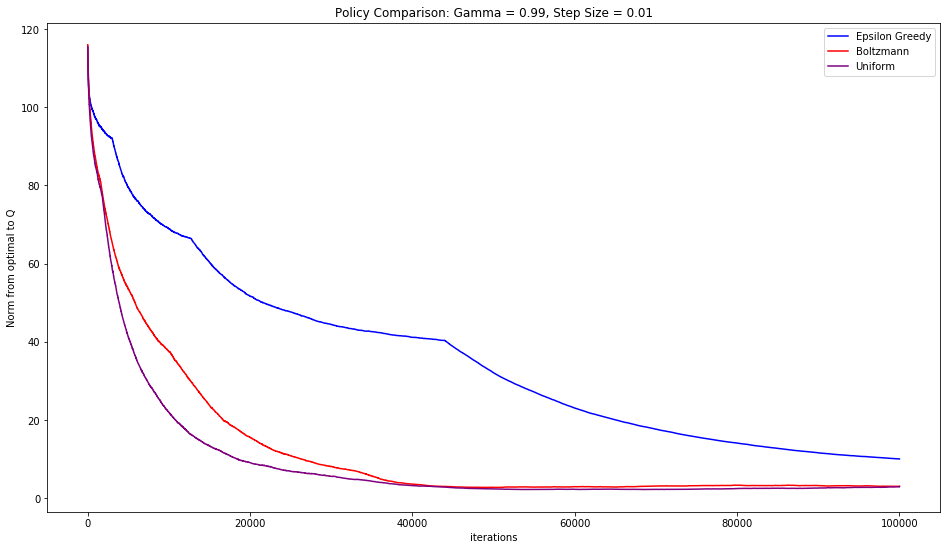

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
import mdptoolbox.example
import numpy as np
import sys
import time
import time
import timeit
import warnings
warnings.filterwarnings('ignore')
'''
Class MarkovDP contains the following attributes:
1)Number of states  : s
2)Number of actions : a
3)State Space
4)Action Space
5)Transition probability matrix of size (a,s,s)
6)Reward matrix (a,s,s)
'''
class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.terminal              = 10
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        #print(rewards)
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.transitions, self.rewards         = mdptoolbox.example.rand(self.num_state,self.num_action)
        self.rewards                           = np.array([[0.997994,   0.98788917, 0.60332299, 0.12802087, 0.58319283, 0.00206464,  0.19891133, 0.95612316, 0.33044057, 0.63839011, 0], [0.94782189, 0.72855873, 0.32965116, 0.79176142, 0.10816552, 0.39231894, 0.22121813, 0.68372645, 0.10244628, 0.39702583, 0], [0.50634292, 0.34989768, 0.70641058, 0.02457702, 0.63398692, 0.23057129, 0.26870903, 0.8002556, 0.95556839, 0.31655021, 0]])
        self.transitions = np.array([[[0.11847748, 0.19305238, 0.01481604, 0.01817262, 0, 0.17366014, 0, 0.18145908, 0.20411116, 0, 0.09625109],  [0, 0, 0,  0,  0.46826678, 0.36019586,  0, 0, 0.17153736, 0, 0],  [0.07475531, 0, 0.01508056, 0.16279467, 0.13320348, 0.06239095, 0.12301144, 0, 0.13540043, 0.21847012, 0.07489302],  
                                      [0.13814029, 0.06730593, 0, 0.09866972, 0.14967253, 0.11755563, 0, 0.08509865, 0.16229298, 0.10931584, 0.07194841],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  [0.10880415, 0.15445165, 0.04159541, 0.10569029, 0.13451247, 0.11685767, 0.1501084,  0.08625954, 0.0330554,  0.03461996, 0.03404507],  
                                      [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0.1601253,  0.00675311, 0.16565002, 0.0205337,  0.04822082, 0.16615123, 0.16225705, 0.01011529, 0.0463817,  0.06362496, 0.15018681],  [0,0, 0, 1, 0, 0, 0, 0, 0,  0, 0],  [0,0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                     [[0, 0.11117147, 0.16656168, 0.16435951, 0.07849603, 0.12768003, 0.13023147, 0.05386311, 0.02101482, 0.07788199, 0.06873988],  [0.01079174, 0.07328504, 0.19653109, 0.19074128, 0, 0.08700166, 0.0739198,  0.1895154,  0.01665032, 0.16156368, 0],  [0, 0, 0.71010626, 0, 0, 0, 0.28989374, 0, 0, 0, 0],  
                                      [0.16263389, 0.02465111, 0.04295112, 0.03578322, 0.0962801,  0.16199941, 0.04532637, 0.16105695, 0.0042332,  0.14743767,0.11764696],  [0, 0, 0, 0.21932919, 0.14193876, 0.1975735, 0.06037827, 0, 0, 0, 0.38078027],  [0,  0, 0, 0, 0, 0.589443, 0, 0.410557, 0, 0, 0],  
                                      [0.05534813, 0, 0, 0.09460149, 0, 0.17626906, 0.19154841, 0, 0.28632051, 0.19591239, 0],  [0, 0.06855014, 0.16443767, 0.04956623, 0, 0, 0.08290543, 0, 0.52616951, 0.10837102, 0],  [0.59207374, 0, 0, 0.29608389, 0, 0, 0.03603537, 0.075807,  0, 0, 0],  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  
                                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                     [[0.115062, 0.30149332, 0.32352258, 0, 0.12897445, 0, 0, 0, 0, 0.07410246, 0.05684518],  [0, 0, 0, 0.01559824, 0, 0.15924881, 0, 0.31567349, 0, 0.37221513, 0.13726433],  [0, 0, 0, 0, 0, 0, 0.04173234, 0, 0.60469014, 0.35357751, 0],  [0.43253734, 0.06637228, 0.11537205, 0, 0, 0, 0, 0.23920235, 0.14651598, 0, 0],  
                                      [0.11651935, 0, 0.09736477, 0.05912902, 0.0166053,  0.24496303,  0.25685277, 0.03358916, 0.09352876, 0.04903922, 0.03240864],  [0.04183482, 0.19949461, 0.34397351, 0.12508018, 0.06331242, 0.13853659, 0, 0.05888664, 0, 0.02888122, 0],  [0, 0, 0.38278206, 0.31992955, 0.07684582, 0, 0.22044257, 0, 0,  0, 0],  
                                      [0.00632422, 0, 0, 0, 0, 0.32682937, 0, 0, 0.59930853, 0, 0.06753787],  [0.23875881, 0.17353509, 0.18098514, 0, 0, 0.09674519, 0, 0, 0, 0.0165584,  0.29341737],  [0, 0, 0, 0,0, 0, 0, 0, 0, 0, 1],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]])

        
#having a min epsilon of 0.1 makes sure that no matter what there is some exploration so that if the epsilon decays too fast the enviornment is not dependent on its previous knowledge
class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 200000, printMod = 20000, max_steps = 100, min_epsilon= 0.1, epsilon = 1.00, gamma = 0.99, step = 0.01, tau = 100000, tau_decay = True, decay_factor_tau = 1.5):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_epsilon = min_epsilon 
        self.gamma = gamma
        self.step = step
        self.printMod =  printMod
        self.env = env #gym.make('CartPole-v0')
        self.num_state = self.env.num_state
        self.num_action = self.env.num_action
        self.states = self.env.states
        self.actions = self.env.actions
        self.transitions = self.env.transitions
        self.rewards = self.env.rewards
        self.QTable = np.ones((env.num_state, env.num_action))
        self.zeros = np.full((10,3), 0)
        self.QFunction = np.array([[22.64548446, 23.21740539, 23.11992163], [24.79556787, 24.64276343, 21.08847243], [22.42808202, 24.28306143, 24.28723371], [22.10055134, 21.79339319, 23.56944243], [ 0.58319283, 14.81946177, 23.67946435], [23.01378582, 24.71033772, 24.25958094], [23.62645803, 23.9339434,  23.97032516], [21.15633866, 24.35306117, 22.98125129], [23.66418858, 23.30295797, 17.8162478 ], [24.0659368, 23.73077384,  0.31655021], [ 0,          0,          0        ]])
        self.tau = tau    # tau --> 0 pure exploitation tau --> infinity pure exploration
        self.tau_decay = tau_decay
        self.decay_factor_tau = decay_factor_tau          

    def epsilon_action(self, state, epsilon):
        ''' choose an action using the epsilon policy '''
        if np.random.random() <= epsilon:
            #print(self.env.actions)
            action = random.choice(self.env.actions)
            action = list(self.env.actions).index(action)
        else:
            action = np.argmax(self.QTable[state])  # exploitation
        return action
    
    def boltzmann_action(self, state, tau):
        qList = self.QTable[state] #moves = self.q_matrix[pos_index]
        self.actions = [i for i in range(0, self.env.num_action)]
        # Circumvent math issues with temperature actually being 0
        if self.tau > 0.0:
            #print(self.tau)
            # Compute action probabilities using tau; when
            # tau is high, we're treating values of very different
            # Q-values as more equally choosable
            action_probs_numes = []
            denom = 0
            for q in qList:
                val = math.exp(q / self.tau)
                action_probs_numes.append(val)
                denom += val  # summation of the values
            action_probs = []
            for x in action_probs_numes:
                probs = x / denom 
                action_probs.append(probs)    
            # Pick random move, in which moves with higher probability are
            # more likely to be chosen, but it is obviously not guaranteed
            prob_sum = 0
            action = random.choices(self.actions, weights=action_probs, k=1)[0] # the weights give a weight to correspond 
            #for each action , and then chooses a random action with each action weighted by it prob. and then chooses
            #I attemped using the action for the max probabilty but it only returned one action each time
        else:
            # Here, we're totally cold; meaning, we're just exploiting
            action = np.argmax(self.QTable[state])
        return action
    
    def uniform_action(self, state):
        ''' choose an action using the epsilon policy '''
        action = random.choice(self.env.actions)
        action = list(self.env.actions).index(action)
        return action
    
    def action_policy(self, state, policy):
        return policy[state]

    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size
    
    def decay_step_size(self, tt, e, t):
        num = self.alpha
        dem = tt**self.beta
        if e == 0 and t == 0:
            step_size = 1
        elif tt > 0:
            step_size = num / dem
        return step_size 
    
    def decay_tau(self, t):          
        if self.tau_decay is True:
            #print(t)
            new_tau = self.tau - self.decay_factor_tau
        if new_tau < 1.0:
            self.tau = 1.0
        else:
            self.tau = new_tau
        return new_tau 
    
def epsilon_learning(Qlearning):
    rewards = []
    alphaList = []
    epsilonList = []
    QList = []
    Q = []
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):  
        if e % Qlearning.printMod == 0:
            print(e)
        epsilon = Qlearning.decay_epsilon()
        state = np.random.randint(0, Qlearning.num_state)
        r = 0
        for t in range(Qlearning.max_steps):
            step_size = Qlearning.decay_step_size(tt, e, t)
            tt+=1
            if e % 2 == 0:
                action = Qlearning.epsilon_action(state, epsilon)
            if e % 2 == 1:
                action = Qlearning.action_policy(state, policy)
            transitionVector = Qlearning.transitions[action][state]
            new_state = random.choices(population=Qlearning.states, weights=list(transitionVector))
            new_state = new_state[0]
            reward = Qlearning.rewards[action][state]
            Qlearning.Q_Update(state, action, reward, new_state, step_size)
            r+=reward
            state = new_state 
            if state == 10:
                #print("e", e)
                break
        stateTuple = list()
        stateList = []
        actionsList = []
        states = []
        #print(self.QTable)
        for list1 in Qlearning.QTable:
            actions = np.argmax(list1)
            actionsList.append(actions)
        observations = np.argwhere(Qlearning.QTable>=0)
        for obsList in observations:
            stateTuple = (obsList[0])
            stateList.append(stateTuple)
        #print(stateList)
        del stateList[1::3]
        del stateList[1::2]
        policy = dict(zip(stateList, actionsList))
        #print(policy)
        if e % 2 == 1:
            rewards.append(r)
            QList.append((np.linalg.norm(Qlearning.QTable - Qlearning.QFunction)))
            #Q.append(np.linalg.norm(self.QTable - self.QFunction))
            alphaList.append(step_size)
            epsilonList.append(epsilon)
    #print(self.QTable)
    return QList

def boltzmann_learning(Qlearning): #, max_episodes = 400, min_epsilon=0.1, epsilon = 1.0, gamma = 0.95):
    rewards = []
    alphaList = []
    epsilonList = []
    QList = []
    Q = []
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):  
        if e % Qlearning.printMod == 0:
            print(e)
        tau = Qlearning.decay_tau(e)
        step_size = Qlearning.step #0.01 #self.decay_step_size(e)
        state = np.random.randint(0, Qlearning.num_state)
        r = 0
        for t in range(Qlearning.max_steps):
            step_size = Qlearning.decay_step_size(tt, e, t)
            tt+=1
            if e % 2 == 0:
                action = Qlearning.boltzmann_action(state, tau)
            if e % 2 == 1:
                action = Qlearning.action_policy(state, policy)
            transitionVector = Qlearning.transitions[action][state]
            new_state = random.choices(population=Qlearning.states, weights=list(transitionVector))
            new_state = new_state[0]
            reward = Qlearning.rewards[action][state]
            Qlearning.Q_Update(state, action, reward, new_state, step_size)
            r+=reward
            state = new_state 
            if state == 10:
                #print("e", e)
                break
        stateTuple = list()
        stateList = []
        actionsList = []
        states = []
        #print(self.QTable)
        for list1 in Qlearning.QTable:
            actions = np.argmax(list1)
            actionsList.append(actions)
        observations = np.argwhere(Qlearning.QTable>=0)
        for obsList in observations:
            stateTuple = (obsList[0])
            stateList.append(stateTuple)
        #print(stateList)
        del stateList[1::3]
        del stateList[1::2]
        policy = dict(zip(stateList, actionsList))
        #print(policy)
        if e % 2 == 1:
            rewards.append(r)
            QList.append((np.linalg.norm(Qlearning.QTable - Qlearning.QFunction)))
            #Q.append(np.linalg.norm(self.QTable - self.QFunction))
            alphaList.append(step_size)
            epsilonList.append(tau)
    #print(self.QTable)
    return QList

def uniform_learning(Qlearning): #, max_episodes = 400, gamma = 0.95):
    rewards = []
    alphaList = []
    epsilonList = []
    QList = []
    Q = []
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):  
        if e % Qlearning.printMod == 0:
            print(e)
        step_size = Qlearning.step #0.01 #self.decay_step_size(e)
        state = np.random.randint(0, Qlearning.num_state)
        r = 0
        for t in range(Qlearning.max_steps):
            step_size = Qlearning.decay_step_size(tt, e, t)
            tt+=1
            if e % 2 == 0:
                action = Qlearning.uniform_action(state)
            if e % 2 == 1:
                action = Qlearning.action_policy(state, policy)
            transitionVector = Qlearning.transitions[action][state]
            new_state = random.choices(population=Qlearning.states, weights=list(transitionVector))
            new_state = new_state[0]
            reward = Qlearning.rewards[action][state]
            Qlearning.Q_Update(state, action, reward, new_state, step_size)
            r+=reward
            state = new_state 
            if state == 10:
                #print("e", e)
                break
        stateTuple = list()
        stateList = []
        actionsList = []
        states = []
        #print(self.QTable)
        for list1 in Qlearning.QTable:
            actions = np.argmax(list1)
            actionsList.append(actions)
        observations = np.argwhere(Qlearning.QTable>=0)
        for obsList in observations:
            stateTuple = (obsList[0])
            stateList.append(stateTuple)
        #print(stateList)
        del stateList[1::3]
        del stateList[1::2]
        policy = dict(zip(stateList, actionsList))
        #print(policy)
        if e % 2 == 1:
            rewards.append(r)
            QList.append((np.linalg.norm(Qlearning.QTable - Qlearning.QFunction)))
            #Q.append(np.linalg.norm(self.QTable - self.QFunction))
    #print(self.QTable)
    return QList


if __name__ == '__main__':
    ''' Run main program. '''
    #main()
    #env= MarkovDP(10,3)      #Define an MDP Environment : Insantiate Class
    #env.initialize_mdp()    #Define P and R
    start_time = time.time()
    env = MarkovDP(11,3)
    env.initialize_mdp()
    solve = Qlearning(env) #MarkovDP)
    EG = epsilon_learning(solve)
    print("EPSILON GREEDY POLICY MINIMUM:", min(EG))
    solve = Qlearning(env)
    BP = boltzmann_learning(solve)
    print("BOLTZMANN POLICY MINIMUM:", min(BP))
    solve = Qlearning(env)
    UP = uniform_learning(solve)
    print("UNIFORM POLICY MINIMUM:", min(UP))
    #QList, QLog = solve.learning()
    print("--- %s seconds ---" % (time.time() - start_time))
    fig = plt.figure(figsize=(16,9))
    plt1 = fig.add_subplot(111)
    plt1.plot(EG,  # epsilon_hist,
             color='b',
             label='Epsilon Greedy')
    plt1.plot(BP,  # epsilon_hist,
             color='r',
             label='Boltzmann')
    plt1.plot(UP,  # epsilon_hist,
             color='purple',
             label='Uniform')
    plt1.set(title='Policy Comparison: Gamma = 0.99, Step Size = 0.01', 
            ylabel='Norm from optimal to Q',
            xlabel='iterations')
    fig.subplots_adjust(hspace=0.7)
    #ax1.legend(loc='best')
    plt1.legend(loc='best')
    #ax3.legend(loc='best')

    plt.show()

# Restarting Diminishing

0
20000
40000
60000
80000
100000
120000
140000
EPSILON GREEDY POLICY MINIMUM: 8.571836910153452
0
20000
40000
60000
80000
100000
120000
140000
BOLTZMANN POLICY MINIMUM: 13.603705437228935
0
20000
40000
60000
80000
100000
120000
140000
UNIFORM POLICY MINIMUM: 10.31082615491359
--- 501.5479099750519 seconds ---


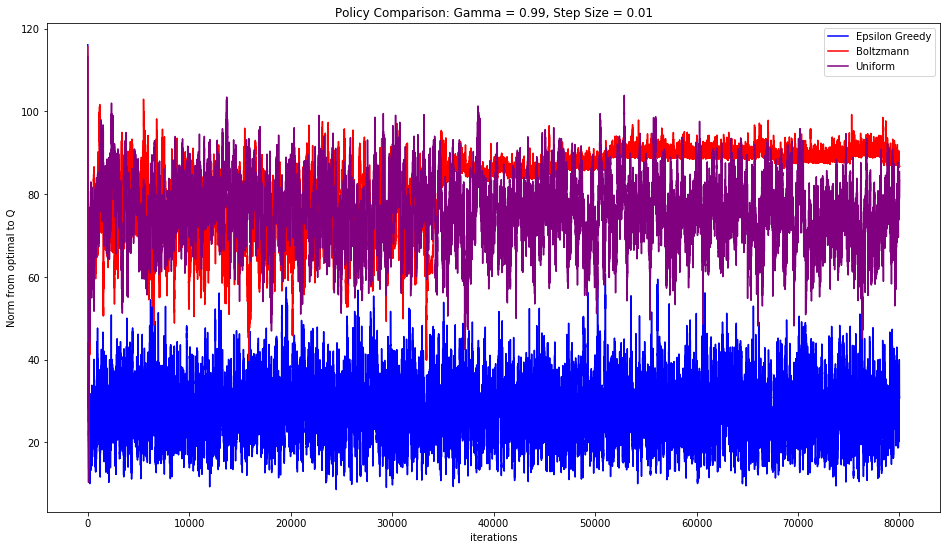

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import deque
from queue import Queue
import random
import mdptoolbox.example
import numpy as np
import sys
import time
import time
import timeit
import warnings
warnings.filterwarnings('ignore')
'''
Class MarkovDP contains the following attributes:
1)Number of states  : s
2)Number of actions : a
3)State Space
4)Action Space
5)Transition probability matrix of size (a,s,s)
6)Reward matrix (a,s,s)
'''
class MarkovDP:
    def __init__(self,s,a):
        self.num_state             = s
        self.num_action            = a
        self.terminal              = 10
        self.states                = np.array(range(0,s))
        self.actions               = np.array(range(0,a))
        self.transitions           = np.zeros((a,s,s))
        self.rewards               = np.zeros((a,s,s))
        #print(rewards)
        
# The function below initializes transition probability matrix and rewards marks 

    def initialize_mdp(self):      
        np.random.seed(0)        #for reproducibility 
        self.transitions, self.rewards         = mdptoolbox.example.rand(self.num_state,self.num_action)
        self.rewards                           = np.array([[0.997994,   0.98788917, 0.60332299, 0.12802087, 0.58319283, 0.00206464,  0.19891133, 0.95612316, 0.33044057, 0.63839011, 0], [0.94782189, 0.72855873, 0.32965116, 0.79176142, 0.10816552, 0.39231894, 0.22121813, 0.68372645, 0.10244628, 0.39702583, 0], [0.50634292, 0.34989768, 0.70641058, 0.02457702, 0.63398692, 0.23057129, 0.26870903, 0.8002556, 0.95556839, 0.31655021, 0]])
        self.transitions = np.array([[[0.11847748, 0.19305238, 0.01481604, 0.01817262, 0, 0.17366014, 0, 0.18145908, 0.20411116, 0, 0.09625109],  [0, 0, 0,  0,  0.46826678, 0.36019586,  0, 0, 0.17153736, 0, 0],  [0.07475531, 0, 0.01508056, 0.16279467, 0.13320348, 0.06239095, 0.12301144, 0, 0.13540043, 0.21847012, 0.07489302],  
                                      [0.13814029, 0.06730593, 0, 0.09866972, 0.14967253, 0.11755563, 0, 0.08509865, 0.16229298, 0.10931584, 0.07194841],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  [0.10880415, 0.15445165, 0.04159541, 0.10569029, 0.13451247, 0.11685767, 0.1501084,  0.08625954, 0.0330554,  0.03461996, 0.03404507],  
                                      [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0.1601253,  0.00675311, 0.16565002, 0.0205337,  0.04822082, 0.16615123, 0.16225705, 0.01011529, 0.0463817,  0.06362496, 0.15018681],  [0,0, 0, 1, 0, 0, 0, 0, 0,  0, 0],  [0,0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                     [[0, 0.11117147, 0.16656168, 0.16435951, 0.07849603, 0.12768003, 0.13023147, 0.05386311, 0.02101482, 0.07788199, 0.06873988],  [0.01079174, 0.07328504, 0.19653109, 0.19074128, 0, 0.08700166, 0.0739198,  0.1895154,  0.01665032, 0.16156368, 0],  [0, 0, 0.71010626, 0, 0, 0, 0.28989374, 0, 0, 0, 0],  
                                      [0.16263389, 0.02465111, 0.04295112, 0.03578322, 0.0962801,  0.16199941, 0.04532637, 0.16105695, 0.0042332,  0.14743767,0.11764696],  [0, 0, 0, 0.21932919, 0.14193876, 0.1975735, 0.06037827, 0, 0, 0, 0.38078027],  [0,  0, 0, 0, 0, 0.589443, 0, 0.410557, 0, 0, 0],  
                                      [0.05534813, 0, 0, 0.09460149, 0, 0.17626906, 0.19154841, 0, 0.28632051, 0.19591239, 0],  [0, 0.06855014, 0.16443767, 0.04956623, 0, 0, 0.08290543, 0, 0.52616951, 0.10837102, 0],  [0.59207374, 0, 0, 0.29608389, 0, 0, 0.03603537, 0.075807,  0, 0, 0],  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  
                                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], 
                                     [[0.115062, 0.30149332, 0.32352258, 0, 0.12897445, 0, 0, 0, 0, 0.07410246, 0.05684518],  [0, 0, 0, 0.01559824, 0, 0.15924881, 0, 0.31567349, 0, 0.37221513, 0.13726433],  [0, 0, 0, 0, 0, 0, 0.04173234, 0, 0.60469014, 0.35357751, 0],  [0.43253734, 0.06637228, 0.11537205, 0, 0, 0, 0, 0.23920235, 0.14651598, 0, 0],  
                                      [0.11651935, 0, 0.09736477, 0.05912902, 0.0166053,  0.24496303,  0.25685277, 0.03358916, 0.09352876, 0.04903922, 0.03240864],  [0.04183482, 0.19949461, 0.34397351, 0.12508018, 0.06331242, 0.13853659, 0, 0.05888664, 0, 0.02888122, 0],  [0, 0, 0.38278206, 0.31992955, 0.07684582, 0, 0.22044257, 0, 0,  0, 0],  
                                      [0.00632422, 0, 0, 0, 0, 0.32682937, 0, 0, 0.59930853, 0, 0.06753787],  [0.23875881, 0.17353509, 0.18098514, 0, 0, 0.09674519, 0, 0, 0, 0.0165584,  0.29341737],  [0, 0, 0, 0,0, 0, 0, 0, 0, 0, 1],  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]])

        
#having a min epsilon of 0.1 makes sure that no matter what there is some exploration so that if the epsilon decays too fast the enviornment is not dependent on its previous knowledge
class Qlearning(MarkovDP):
    def __init__(self, env, max_episodes = 160000, printMod = 20000, max_steps = 100, min_epsilon= 0.1, epsilon = 1.00, gamma = 0.99, step = 0.01, tau = 100000, tau_decay = True, decay_factor_tau = 1.5):   #max_env_steps=None
        self.max_episodes = max_episodes # number of training episodes 
        self.max_steps = max_steps # average ticks over 100 episodes required for win
        self.alpha = 1.0 # learning rate parameter
        self.beta = 0.5 # learning rate parameter
        self.epsilon = epsilon # exploration rate
        self.min_epsilon = min_epsilon 
        self.gamma = gamma
        self.step = step
        self.printMod =  printMod
        self.env = env #gym.make('CartPole-v0')
        self.num_state = self.env.num_state
        self.num_action = self.env.num_action
        self.states = self.env.states
        self.actions = self.env.actions
        self.transitions = self.env.transitions
        self.rewards = self.env.rewards
        self.QTable = np.ones((env.num_state, env.num_action))
        self.zeros = np.full((10,3), 0)
        self.QFunction = np.array([[22.64548446, 23.21740539, 23.11992163], [24.79556787, 24.64276343, 21.08847243], [22.42808202, 24.28306143, 24.28723371], [22.10055134, 21.79339319, 23.56944243], [ 0.58319283, 14.81946177, 23.67946435], [23.01378582, 24.71033772, 24.25958094], [23.62645803, 23.9339434,  23.97032516], [21.15633866, 24.35306117, 22.98125129], [23.66418858, 23.30295797, 17.8162478 ], [24.0659368, 23.73077384,  0.31655021], [ 0,          0,          0        ]])
        self.tau = tau    # tau --> 0 pure exploitation tau --> infinity pure exploration
        self.tau_decay = tau_decay
        self.decay_factor_tau = decay_factor_tau          

    def epsilon_action(self, state, epsilon):
        ''' choose an action using the epsilon policy '''
        if np.random.random() <= epsilon:
            #print(self.env.actions)
            action = random.choice(self.env.actions)
            action = list(self.env.actions).index(action)
        else:
            action = np.argmax(self.QTable[state])  # exploitation
        return action
    
    def boltzmann_action(self, state, tau):
        qList = self.QTable[state] #moves = self.q_matrix[pos_index]
        self.actions = [i for i in range(0, self.env.num_action)]
        # Circumvent math issues with temperature actually being 0
        if self.tau > 0.0:
            #print(self.tau)
            # Compute action probabilities using tau; when
            # tau is high, we're treating values of very different
            # Q-values as more equally choosable
            action_probs_numes = []
            denom = 0
            for q in qList:
                val = math.exp(q / self.tau)
                action_probs_numes.append(val)
                denom += val  # summation of the values
            action_probs = []
            for x in action_probs_numes:
                probs = x / denom 
                action_probs.append(probs)    
            # Pick random move, in which moves with higher probability are
            # more likely to be chosen, but it is obviously not guaranteed
            prob_sum = 0
            action = random.choices(self.actions, weights=action_probs, k=1)[0] # the weights give a weight to correspond 
            #for each action , and then chooses a random action with each action weighted by it prob. and then chooses
            #I attemped using the action for the max probabilty but it only returned one action each time
        else:
            # Here, we're totally cold; meaning, we're just exploiting
            action = np.argmax(self.QTable[state])
        return action
    
    def uniform_action(self, state):
        ''' choose an action using the epsilon policy '''
        action = random.choice(self.env.actions)
        action = list(self.env.actions).index(action)
        return action
    
    def action_policy(self, state, policy):
        return policy[state]

    def Q_Update(self, state, action, reward, new_state, step_size):
        ''' Update the Q-values'''
        self.QTable[state][action] += step_size * (reward + self.gamma * (np.max(self.QTable[new_state])) - self.QTable[state][action])
        
    def decay_epsilon(self):
        epsilon = self.epsilon * 0.99
        if epsilon < self.min_epsilon:
            self.epsilon = self.min_epsilon
        else:
            self.epsilon = epsilon
        return epsilon 
    
    def decay_step_size(self, t):
        if t == 0:
            step_size = 1.0
        elif t > 0:
            step_size = self.alpha / (t ** self.beta)  
        return step_size 
    
    def decay_tau(self, t):          
        if self.tau_decay is True:
            #print(t)
            new_tau = self.tau - self.decay_factor_tau
        if new_tau < 1.0:
            self.tau = 1.0
        else:
            self.tau = new_tau
        return new_tau 
    
def epsilon_learning(Qlearning):
    rewards = []
    alphaList = []
    epsilonList = []
    QList = []
    Q = []
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):  
        if e % Qlearning.printMod == 0:
            print(e)
        epsilon = Qlearning.decay_epsilon()
        state = np.random.randint(0, Qlearning.num_state)
        r = 0
        step_size = 1 #Qlearning.decay_step_size(t)
        for t in range(Qlearning.max_steps):
            step_size = Qlearning.decay_step_size(t)
            tt+=1
            if e % 2 == 0:
                action = Qlearning.epsilon_action(state, epsilon)
            if e % 2 == 1:
                action = Qlearning.action_policy(state, policy)
            transitionVector = Qlearning.transitions[action][state]
            new_state = random.choices(population=Qlearning.states, weights=list(transitionVector))
            new_state = new_state[0]
            reward = Qlearning.rewards[action][state]
            Qlearning.Q_Update(state, action, reward, new_state, step_size)
            r+=reward
            state = new_state 
            if state == 10:
                #print("e", e)
                break
        stateTuple = list()
        stateList = []
        actionsList = []
        states = []
        #print(self.QTable)
        for list1 in Qlearning.QTable:
            actions = np.argmax(list1)
            actionsList.append(actions)
        observations = np.argwhere(Qlearning.QTable>=0)
        for obsList in observations:
            stateTuple = (obsList[0])
            stateList.append(stateTuple)
        #print(stateList)
        del stateList[1::3]
        del stateList[1::2]
        policy = dict(zip(stateList, actionsList))
        #print(policy)
        if e % 2 == 1:
            rewards.append(r)
            QList.append((np.linalg.norm(Qlearning.QTable - Qlearning.QFunction)))
            #Q.append(np.linalg.norm(self.QTable - self.QFunction))
            alphaList.append(step_size)
            epsilonList.append(epsilon)
    #print(self.QTable)
    return QList

def boltzmann_learning(Qlearning): #, max_episodes = 400, min_epsilon=0.1, epsilon = 1.0, gamma = 0.95):
    rewards = []
    alphaList = []
    epsilonList = []
    QList = []
    Q = []
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):  
        if e % Qlearning.printMod == 0:
            print(e)
        tau = Qlearning.decay_tau(e)
        step_size = 1  #0.01 #self.decay_step_size(e)
        state = np.random.randint(0, Qlearning.num_state)
        r = 0
        for t in range(Qlearning.max_steps):
            step_size = Qlearning.decay_step_size(t)
            tt+=1
            if e % 2 == 0:
                action = Qlearning.boltzmann_action(state, tau)
            if e % 2 == 1:
                action = Qlearning.action_policy(state, policy)
            transitionVector = Qlearning.transitions[action][state]
            new_state = random.choices(population=Qlearning.states, weights=list(transitionVector))
            new_state = new_state[0]
            reward = Qlearning.rewards[action][state]
            Qlearning.Q_Update(state, action, reward, new_state, step_size)
            r+=reward
            state = new_state 
            if state == 10:
                #print("e", e)
                break
        stateTuple = list()
        stateList = []
        actionsList = []
        states = []
        #print(self.QTable)
        for list1 in Qlearning.QTable:
            actions = np.argmax(list1)
            actionsList.append(actions)
        observations = np.argwhere(Qlearning.QTable>=0)
        for obsList in observations:
            stateTuple = (obsList[0])
            stateList.append(stateTuple)
        #print(stateList)
        del stateList[1::3]
        del stateList[1::2]
        policy = dict(zip(stateList, actionsList))
        #print(policy)
        if e % 2 == 1:
            rewards.append(r)
            QList.append((np.linalg.norm(Qlearning.QTable - Qlearning.QFunction)))
            #Q.append(np.linalg.norm(self.QTable - self.QFunction))
            alphaList.append(step_size)
            epsilonList.append(tau)
    #print(self.QTable)
    return QList

def uniform_learning(Qlearning): #, max_episodes = 400, gamma = 0.95):
    rewards = []
    alphaList = []
    epsilonList = []
    QList = []
    Q = []
    tt=0
    r = 0
    q = 0
    for e in range(Qlearning.max_episodes):  
        if e % Qlearning.printMod == 0:
            print(e)
        step_size = 1  #0.01 #self.decay_step_size(e)
        state = np.random.randint(0, Qlearning.num_state)
        r = 0
        for t in range(Qlearning.max_steps):
            step_size = Qlearning.decay_step_size(t)
            tt+=1
            if e % 2 == 0:
                action = Qlearning.uniform_action(state)
            if e % 2 == 1:
                action = Qlearning.action_policy(state, policy)
            transitionVector = Qlearning.transitions[action][state]
            new_state = random.choices(population=Qlearning.states, weights=list(transitionVector))
            new_state = new_state[0]
            reward = Qlearning.rewards[action][state]
            Qlearning.Q_Update(state, action, reward, new_state, step_size)
            r+=reward
            state = new_state 
            if state == 10:
                #print("e", e)
                break
        stateTuple = list()
        stateList = []
        actionsList = []
        states = []
        #print(self.QTable)
        for list1 in Qlearning.QTable:
            actions = np.argmax(list1)
            actionsList.append(actions)
        observations = np.argwhere(Qlearning.QTable>=0)
        for obsList in observations:
            stateTuple = (obsList[0])
            stateList.append(stateTuple)
        #print(stateList)
        del stateList[1::3]
        del stateList[1::2]
        policy = dict(zip(stateList, actionsList))
        #print(policy)
        if e % 2 == 1:
            rewards.append(r)
            QList.append((np.linalg.norm(Qlearning.QTable - Qlearning.QFunction)))
            #Q.append(np.linalg.norm(self.QTable - self.QFunction))
    #print(self.QTable)
    return QList


if __name__ == '__main__':
    ''' Run main program. '''
    #main()
    #env= MarkovDP(10,3)      #Define an MDP Environment : Insantiate Class
    #env.initialize_mdp()    #Define P and R
    start_time = time.time()
    env = MarkovDP(11,3)
    env.initialize_mdp()
    solve = Qlearning(env) #MarkovDP)
    EG = epsilon_learning(solve)
    print("EPSILON GREEDY POLICY MINIMUM:", min(EG))
    solve = Qlearning(env)
    BP = boltzmann_learning(solve)
    print("BOLTZMANN POLICY MINIMUM:", min(BP))
    solve = Qlearning(env)
    UP = uniform_learning(solve)
    print("UNIFORM POLICY MINIMUM:", min(UP))
    #QList, QLog = solve.learning()
    print("--- %s seconds ---" % (time.time() - start_time))
    fig = plt.figure(figsize=(16,9))
    plt1 = fig.add_subplot(111)
    plt1.plot(EG,  # epsilon_hist,
             color='b',
             label='Epsilon Greedy')
    plt1.plot(BP,  # epsilon_hist,
             color='r',
             label='Boltzmann')
    plt1.plot(UP,  # epsilon_hist,
             color='purple',
             label='Uniform')
    plt1.set(title='Policy Comparison: Gamma = 0.99, Step Size = 0.01', 
            ylabel='Norm from optimal to Q',
            xlabel='iterations')
    fig.subplots_adjust(hspace=0.7)
    #ax1.legend(loc='best')
    plt1.legend(loc='best')
    #ax3.legend(loc='best')

    plt.show()